In [20]:
from matplotlib import pyplot as  plt
import matplotlib.ticker as mtick
import os 
import numpy as np 
import pandas as pd
import shutil
import re
from scipy.interpolate import interp1d

textsize = 20 
legendsize = 15

In [2]:


def closest_value(lst, target):
    return min(lst, key=lambda x: abs(x - target))

def cell_finderfM(out):
    path = os.getcwd()
    filename = '/src/tables/fM_tables/fM_add0.txt'
    file1 = '{}/{}'.format(path,filename)
    df = pd.read_csv(file1, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a') 
    #Get list of all computed a^* values
#Convert from str to float
    header = df.columns
    header = [float(a) for a in header]

#Conversion factor to get fM and Blackhawk output data in same units (fM in GeV, BH in grams)
    gev_to_g = 5.60958884e+23

    fM_a = []
    a = []
    m = []

    # Below loop looks at each line of the blackhawk output
    # First looks at spin (a) and finds the closest existing column in fM (or gM)
    # Then finds the closest existing mass value, and finally extracts the specific cell in fM (or gM) that
    # has an rate for the given black hole mass and effective spin
    for x in out:

        closest_a = closest_value(header, x[0])
        closest_m = closest_value(df.index,gev_to_g*x[1])
        cell = df.loc[closest_m, "{:.5e}".format(closest_a)]
        a.append(closest_a)
        m.append(closest_m)
        fM_a.append(cell)
    return fM_a


def cell_findergM(out):
    path = os.getcwd()
    filename3 = '/src/tables/fM_tables/gM_add0.txt'
    file3 = '{}/{}'.format(path,filename3)
    gdata = pd.read_csv(file3, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a') 

    header = df.columns
    header = [float(a) for a in header]

#Conversion factor to get fM and Blackhawk output data in same units (fM in GeV, BH in grams)
    gev_to_g = 5.60958884e+23

    gM_a = []
    a = []
    m = []

    #Same as above but replaces fM with gM table
    for x in out:
        closest_a = closest_value(header, x[0])
        closest_m = closest_value(gdata.index,gev_to_g*x[1])
        cell = gdata.loc[closest_m, "{:.5e}".format(closest_a)]
        a.append(closest_a)
        m.append(closest_m)
        gM_a.append(cell)
    return gM_a

def sort_scientific_folders(folder_path):
    
    # Get list of folder names
    folders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]

    # Regex pattern to extract numbers in scientific notation
    sci_pattern = re.compile(r"[-+]?\d*\.?\d+e[-+]?\d+")

    # Convert folder names to (numeric_value, folder_name) tuples
    def extract_numeric_value(folder):
        match = sci_pattern.search(folder)
        return float(match.group()) if match else float('inf')  # Handle non-matching cases

    sorted_folders = sorted(folders, key=extract_numeric_value)

    return sorted_folders


def move_text_file(source_folder, destination_folder, file_name):
    # Create the full source and destination paths
    source_path = os.path.join(source_folder, file_name)
    destination_path = os.path.join(destination_folder, file_name)

    # Check if the source file exists
    if not os.path.exists(source_path):
        print(f"Error: {file_name} not found in the source folder.")
        return
    
    # Check if the destination folder exists, if not, create it
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)
        print(f"Destination folder {destination_folder} created.")
    
    # Move the file
    try:
        shutil.move(source_path, destination_path)
        print(f"Moved {file_name} to {destination_folder}")
    except Exception as e:
        print(f"Error moving {file_name}: {e}")


 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+01') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/0e+00/1.0e+01
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/0e+00/1.0e+01

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+02') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables


/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2489242966.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2489242966.py:43: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2489242966.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/0e+00/1.0e+02
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/0e+00/1.0e+02

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+03') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/0e+00/1.0e+03
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/0e+00/1.0e+03

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+04') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2489242966.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2489242966.py:43: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2489242966.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/0e+00/1.0e+05
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/0e+00/1.0e+05

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+07') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/0e+00/1.0e+07
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/0e+00/1.0e+07

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+09') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2489242966.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2489242966.py:43: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2489242966.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/1e-04/1.0e+01
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/1e-04/1.0e+01

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+02') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/1e-04/1.0e+02
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/1e-04/1.0e+02

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+03') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2489242966.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2489242966.py:43: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2489242966.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/1e-04/1.0e+04
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/1e-04/1.0e+04

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+05') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/1e-04/1.0e+05
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/1e-04/1.0e+05

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+07') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2489242966.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2489242966.py:43: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2489242966.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/1e-04/1.0e+09
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/1e-04/1.0e+09
[0.6277452939918833, 0.7044594123795146, 0.7255039137231899, 0.7279788708711664, 0.7282369372329937, 0.7282652460318549, 0.7282605123036135]

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+01') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/2e-04/1.0e+01
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/2e-04/1.0e+01

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+02') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2489242966.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2489242966.py:43: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2489242966.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/2e-04/1.0e+03
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/2e-04/1.0e+03

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+04') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/2e-04/1.0e+04
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/2e-04/1.0e+04

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+05') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2489242966.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2489242966.py:43: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2489242966.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/2e-04/1.0e+07
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/2e-04/1.0e+07

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+09') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/2e-04/1.0e+09
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/2e-04/1.0e+09
[0.6311571621378615, 0.7139902129973287, 0.7370173029387532, 0.7397357408663656, 0.7400096750470471, 0.7400407208940697, 0.7400448603567575]

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+01') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2489242966.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2489242966.py:43: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2489242966.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/3e-04/1.0e+02
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/3e-04/1.0e+02

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+03') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/3e-04/1.0e+03
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/3e-04/1.0e+03

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+04') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2489242966.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2489242966.py:43: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2489242966.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/3e-04/1.0e+05
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/3e-04/1.0e+05

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+07') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/3e-04/1.0e+07
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/3e-04/1.0e+07

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+09') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2489242966.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2489242966.py:43: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2489242966.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

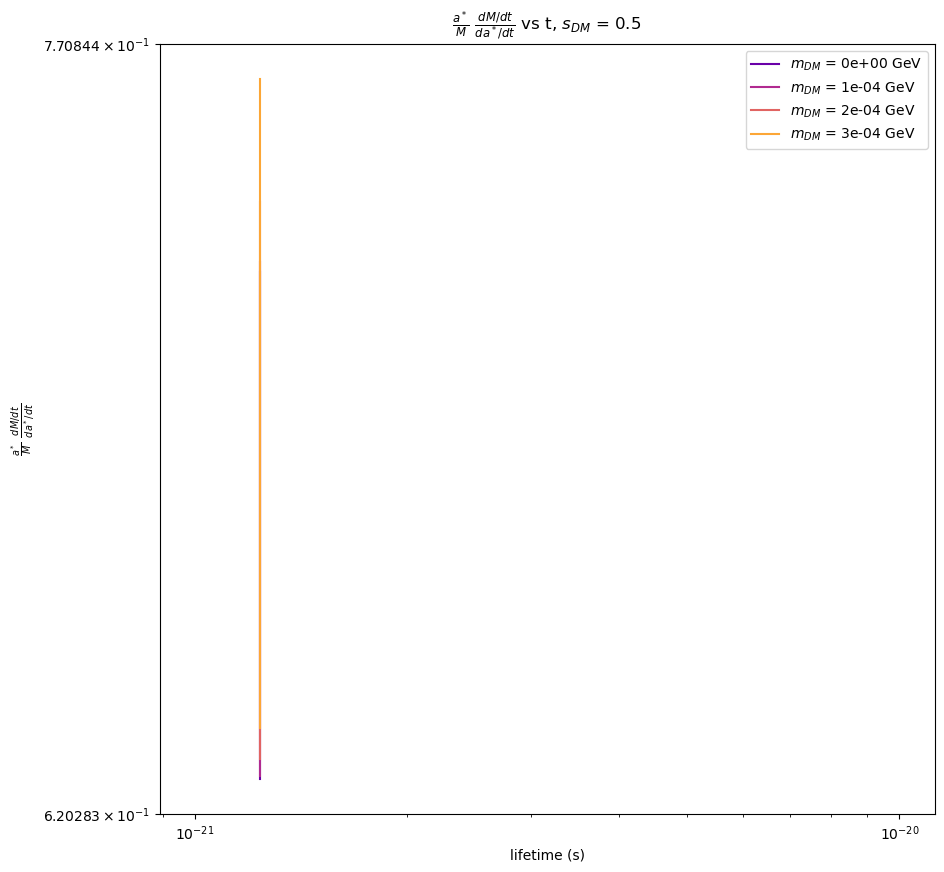

In [3]:
current_dir  = os.getcwd()
main_folder_path = os.path.join(current_dir + '/src/tables/fM_tables/Spin0.5')
output_folder = os.path.join(current_dir +'/spin05_mass')
destination_folder = os.path.join(current_dir +'/src/tables/fM_tables')
fM_file_name = 'fM_add0.txt'
gM_file_name = 'gM_add0.txt'
filepath_fM = destination_folder + '/' + fM_file_name
filepath_gM = destination_folder + '/' + gM_file_name

mdm_values = [0e+0, 1e-4,2e-4, 3e-4,4e-4,5e-5] 
dof_values = [5e00,1e15,1e30]
gev_to_g = 5.60958884e+23
colors = plt.cm.plasma(np.linspace(0, 1, len(mdm_values)))
 


# anything higher than 2e-4 sheds ang mom before particle is introduced
fig, ax = plt.subplots()
mdm_list = [f for f in os.listdir(main_folder_path)]
mdm_list.sort()
for mdm_n, i in enumerate(mdm_list):
    if i != ".DS_Store":
        mass_folder =  os.path.join(output_folder + '/{:.1e}'.format(float(i)))
        os.makedirs(mass_folder, exist_ok=True)
        # dof_list = [f for f in os.listdir(main_folder_path + "/{}".format(i))]
        dof_list = sort_scientific_folders(main_folder_path + "/{}".format(i))

        a_max = []
        t_max = []
        loop = 0
        for j in dof_list:
            if j != ".DS_Store":

                dof_folder =  os.path.join(output_folder + '/{:.1e}'.format(float(i)) + '/{:.1e}'.format(float(j)))
                os.makedirs(dof_folder, exist_ok=True)

                print("\n **************** {} ****************".format(('Mass','DoF')))
                print("**************** {} **************** \n ".format((i,j)))
                move_text_file(os.path.join(main_folder_path + "/{}".format(i)+ "/{}".format(j)), destination_folder, fM_file_name )
                move_text_file(os.path.join(main_folder_path + "/{}".format(i)+ "/{}".format(j)), destination_folder, gM_file_name )

                fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a') 
                gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a') 
                header = fMdata.columns
                header = [float(a) for a in header]
                data_file = [f for f in os.listdir(output_folder + '/{:.1e}'.format(float(i)) + "/{:.1e}".format(float(j))) if f.endswith('.txt')]
                
                #Moves fM, gM into fM folder, then need to extract parameters from this table 
                for n,file in enumerate(data_file):


                    file_path = os.path.join( output_folder + '/{:.1e}'.format(float(i)) + "/{:.1e}".format(float(j)) , file)
                    data = pd.read_csv(file_path,skipinitialspace=True, delimiter =' ', header=0 )
                    # Assume the data has two columns: 'x' and 'y'
                    dadt = []
                    dMdt = []
                    output= [(a,b) for a,b in zip(data['a'],data['M'])]

                    for x in output:
                        closest_a = closest_value(header, x[0])
                        closest_m = closest_value(gMdata.index,gev_to_g*x[1])
                        cellf = fMdata.loc[closest_m, "{:.5e}".format(closest_a)]
                        cellg = gMdata.loc[closest_m, "{:.5e}".format(closest_a)]
                        dadt.append((2*cellf-cellg)/x[1]**3)
                        dMdt.append(-cellf/x[1]**3)

                    time = data['t']
                    numbers = re.findall(r'\d+\.\d+', file)
                    a_change = []
                    t_change = []
                    d = 0
                    for k, a in enumerate(dadt):
                        if a != 0:
                            a_change.append(dMdt[n]/a)
                            t_change.append(time[k])
                            # d+= time[j]/time[len(time)-1]

                    a_max.append(max(a_change))
                    index = a_change.index(max(a_change))
                    t_max.append(t_change[index])


                move_text_file(destination_folder, os.path.join(main_folder_path + "/{}".format(i)+ "/{}".format(j)), fM_file_name )
                move_text_file(destination_folder, os.path.join(main_folder_path + "/{}".format(i)+ "/{}".format(j)), gM_file_name )
        print(a_max)
        ax.plot(t_max, a_max, label = '$m_{DM}$' + ' = {} GeV'.format(i), color = colors[ mdm_n % len(colors)]) 


ax.set_title('$\\frac{a^*}{M} \ \\frac{dM/dt}{da^*/dt}$ vs t, $s_{DM}$ = 0.5')
ax.set_yscale('symlog')
ax.set_xscale('log')
ax.set_ylabel('$\\frac{a^*}{M} \  \\frac{dM/dt}{da^*/dt}$')
ax.set_xlabel('lifetime (s)')
# a.hlines(1,1e26,1e28)

plt.legend()
plt.gcf().set_size_inches(10, 10)

                # print("\n ****************************************** \n\n")


                # new_filename =  dof_folder + "/Kerr_a0.8_{}M".format(i) +"_{}dof.txt".format(j)
            

1.0e+01

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+01') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+01
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+01
1.0e+02

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+02') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+02
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+03
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+03
1.0e+04

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+04') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+04
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+04
1.0e+05

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+05') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+07
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+07
1.0e+09

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+09') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+09
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+09
1.0e+11

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+11') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+12
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+12
1.0e+15

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+15') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+15
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+15
1.0e+20

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+20') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+25
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+25
1.0e+30

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+30') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+30
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+30
1.0e+40

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+40') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+45
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+45
1.0e+50

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+50') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+50
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+50
1.0e+60

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+60') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+80
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+80
1.0e+100

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+100') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+100
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+100
[0.6215006487066254, 0.9347587521105309, 1.2087662166504094, 5.083567914566391, 14.11087399491222, 15.324484504783085, 16.23716799121552, 15.40445114170809, 14.972260986510864, 17.303600447409103, 16.524598100946395, 16.361664731860277, 15.464551048164898, 14.365780758010654, 16.

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+02
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+02
1.0e+03

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+03') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+03
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+03
1.0e+04

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+04') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+05
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+05
1.0e+07

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+07') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+07
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+07
1.0e+09

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+09') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+11
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+11
1.0e+12

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+12') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+12
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+12
1.0e+15

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+15') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+20
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+20
1.0e+25

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+25') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+25
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+25
1.0e+30

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+30') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+40
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+40
1.0e+45

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+45') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+45
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+45
1.0e+50

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+50') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+60
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+60
1.0e+80

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+80') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+80
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+80
1.0e+100

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+100') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_t

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+01
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+01
1.0e+02

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+02') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+02
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+02
1.0e+03

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+03') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+04
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+04
1.0e+05

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+05') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+05
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+05
1.0e+07

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+07') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+09
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+09
1.0e+11

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+11') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+11
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+11
1.0e+12

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+12') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+15
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+15
1.0e+20

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+20') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+20
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+20
1.0e+25

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+25') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+30
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+30
1.0e+40

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+40') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+40
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+40
1.0e+45

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+45') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+50
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+50
1.0e+60

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+60') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+60
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+60
1.0e+80

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+80') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+100
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+100
[0.605139458704078, 0.8728320992372549, 1.595795730717944, 3.0373540398635903, 3.6968556508957002, 3.9526746592957527, 3.531707998129367, 3.9285623119012736, 3.7675269117227494, 4.04039698946072, 3.56346832359973, 3.917265176802512, 3.5840495888747697, 3.5007389712239054, 3.84540740337781, 3.890830292849366, 3.848083155995366, 4.005873443339502, 3.8605733234876314]
1.0e+01

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+01') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+01
Moved gM_add0.txt to 

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+03
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+03
1.0e+04

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+04') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+04
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+04
1.0e+05

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+05') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+07
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+07
1.0e+09

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+09') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+09
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+09
1.0e+11

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+11') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+15
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+15
1.0e+20

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+20') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+20
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+20
1.0e+25

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+25') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+30
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+30
1.0e+40

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+40') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+40
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+40
1.0e+45

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+45') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+50
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+50
1.0e+60

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+60') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+60
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+60
1.0e+80

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+80') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/426185611.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+100
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+100
[0.5763127876572358, 0.7698423311557557, 1.1817251750308526, 1.442937526137821, 1.4620563459229083, 1.484655775284671, 1.438555348238547, 1.5685805940214514, 1.5561352605338157, 1.4857162679167455, 1.5848010173319222, 1.4558767677482651, 1.5783759191879538, 1.512863037604864, 1.4803551669561583, 1.3910476055846224, 1.594270048567023, 1.3444658041463218]


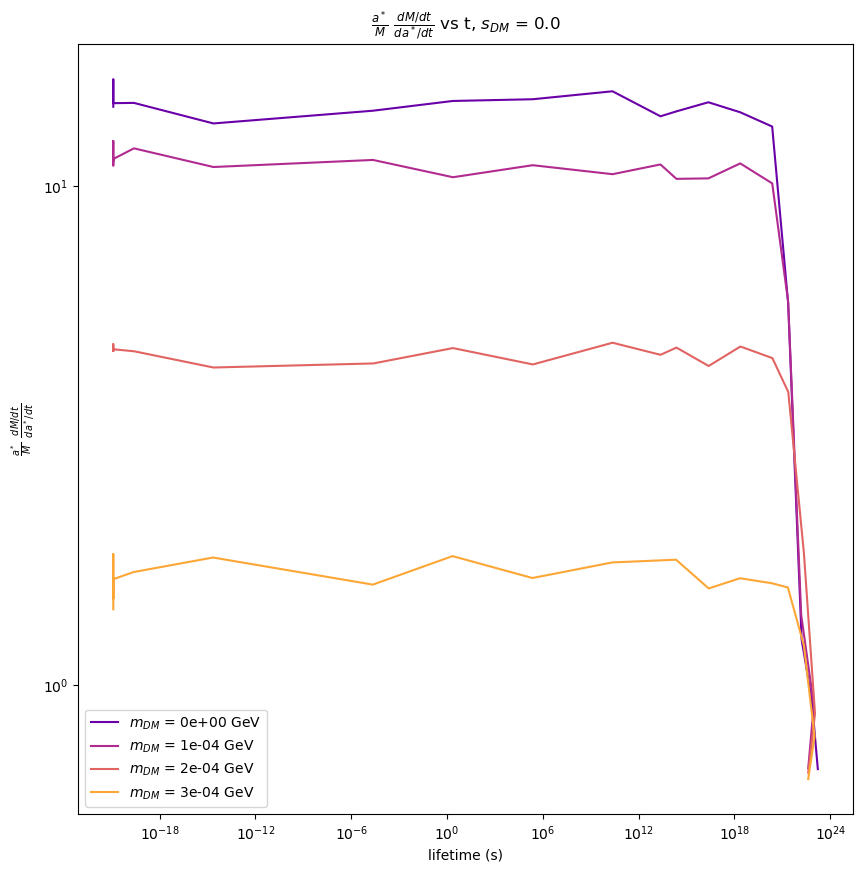

In [4]:
current_dir  = os.getcwd()
main_folder_path = os.path.join(current_dir + '/src/tables/fM_tables/Spin0.0')
output_folder = os.path.join(current_dir +'/spin00_mass')
destination_folder = os.path.join(current_dir +'/src/tables/fM_tables')
fM_file_name = 'fM_add0.txt'
gM_file_name = 'gM_add0.txt'
filepath_fM = destination_folder + '/' + fM_file_name
filepath_gM = destination_folder + '/' + gM_file_name


gev_to_g = 5.60958884e+23
colors = plt.cm.plasma(np.linspace(0, 1, len(mdm_values)))



# anything higher than 2e-4 sheds ang mom before particle is introduced
fig, ax = plt.subplots()
mdm_list = [f for f in os.listdir(main_folder_path)]
mdm_list.sort()
for mdm_n, i in enumerate(mdm_list):
    if i != ".DS_Store":
        mass_folder =  os.path.join(output_folder + '/{:.1e}'.format(float(i)))
        os.makedirs(mass_folder, exist_ok=True)
        dof_list = sort_scientific_folders(main_folder_path + "/{}".format(i))

        a_max = []
        t_max = []
        loop = 0
        for j in dof_list:
            print(j)
            if j != ".DS_Store":

                dof_folder =  os.path.join(output_folder + '/{:.1e}'.format(float(i)) + '/{:.1e}'.format(float(j)))
                os.makedirs(dof_folder, exist_ok=True)

                print("\n **************** {} ****************".format(('Mass','DoF')))
                print("**************** {} **************** \n ".format((i,j)))
                move_text_file(os.path.join(main_folder_path + "/{}".format(i)+ "/{}".format(j)), destination_folder, fM_file_name )
                move_text_file(os.path.join(main_folder_path + "/{}".format(i)+ "/{}".format(j)), destination_folder, gM_file_name )

                fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a') 
                gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a') 
                header = fMdata.columns
                header = [float(a) for a in header]
                data_file = [f for f in os.listdir(output_folder + '/{:.1e}'.format(float(i)) + "/{:.1e}".format(float(j))) if f.endswith('.txt')]
                
                #Moves fM, gM into fM folder, then need to extract parameters from this table 
                for n,file in enumerate(data_file):


                    file_path = os.path.join( output_folder + '/{:.1e}'.format(float(i)) + "/{:.1e}".format(float(j)) , file)
                    data = pd.read_csv(file_path,skipinitialspace=True, delimiter =' ', header=0 )
                    # Assume the data has two columns: 'x' and 'y'
                    dadt = []
                    dMdt = []
                    output= [(a,b) for a,b in zip(data['a'],data['M'])]

                    for x in output:
                        closest_a = closest_value(header, x[0])
                        closest_m = closest_value(gMdata.index,gev_to_g*x[1])
                        cellf = fMdata.loc[closest_m, "{:.5e}".format(closest_a)]
                        cellg = gMdata.loc[closest_m, "{:.5e}".format(closest_a)]
                        dadt.append((2*cellf-cellg)/x[1]**3)
                        dMdt.append(-cellf/x[1]**3)

                    time = data['t']
                    numbers = re.findall(r'\d+\.\d+', file)
                    a_change = []
                    t_change = []
                    d = 0
                    for k, a in enumerate(dadt):
                        if a != 0:
                            a_change.append(dMdt[n]/a)
                            t_change.append(time[k])
                            # d+= time[j]/time[len(time)-1]

                    a_max.append(max(a_change))
                    index = a_change.index(max(a_change))
                    t_max.append(t_change[index])


                move_text_file(destination_folder, os.path.join(main_folder_path + "/{}".format(i)+ "/{}".format(j)), fM_file_name )
                move_text_file(destination_folder, os.path.join(main_folder_path + "/{}".format(i)+ "/{}".format(j)), gM_file_name )
        print(a_max)

        ax.plot(t_max, a_max, label = '$m_{DM}$' + ' = {} GeV'.format(i), color = colors[ mdm_n % len(colors)]) 
        # ax.plot(t_max, a_max, label = '$m_{DM}$' + ' = {} GeV'.format(i), color = colors[ mdm_n % len(colors)], linestyle = 'none', marker = '.') 


ax.set_title('$\\frac{a^*}{M} \ \\frac{dM/dt}{da^*/dt}$ vs t, $s_{DM}$ = 0.0')
ax.set_yscale('symlog')
ax.set_xscale('log')
ax.set_ylabel('$\\frac{a^*}{M} \  \\frac{dM/dt}{da^*/dt}$')
ax.set_xlabel('lifetime (s)')
# a.hlines(1,1e26,1e28)

plt.legend()
plt.gcf().set_size_inches(10, 10)

                # print("\n ****************************************** \n\n")


                # new_filename =  dof_folder + "/Kerr_a0.8_{}M".format(i) +"_{}dof.txt".format(j)
            

1.0e+01

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+01') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/0e+00/1.0e+01
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/0e+00/1.0e+01
1.0e+02

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+02') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables


/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/0e+00/1.0e+02
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/0e+00/1.0e+02
1.0e+03

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+03') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/0e+00/1.0e+03
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/0e+00/1.0e+03
1.0e+04

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+04') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/0e+00/1.0e+04
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/0e+00/1.0e+04
1.0e+05

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+05') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/0e+00/1.0e+05
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/0e+00/1.0e+05
1.0e+07

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+07') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/0e+00/1.0e+07
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/0e+00/1.0e+07
1.0e+09

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+09') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/0e+00/1.0e+09
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/0e+00/1.0e+09
1.0e+11

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+11') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/0e+00/1.0e+11
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/0e+00/1.0e+11
1.0e+12

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+12') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/0e+00/1.0e+12
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/0e+00/1.0e+12
1.0e+15

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+15') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/0e+00/1.0e+15
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/0e+00/1.0e+15
1.0e+20

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+20') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/0e+00/1.0e+20
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/0e+00/1.0e+20
1.0e+25

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+25') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/0e+00/1.0e+25
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/0e+00/1.0e+25
1.0e+30

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+30') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/0e+00/1.0e+30
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/0e+00/1.0e+30
1.0e+40

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+40') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

1.0e+01

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+01') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/1e-04/1.0e+01
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/1e-04/1.0e+01
1.0e+02

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+02') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables


/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/1e-04/1.0e+02
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/1e-04/1.0e+02
1.0e+03

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+03') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/1e-04/1.0e+03
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/1e-04/1.0e+03
1.0e+04

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+04') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/1e-04/1.0e+04
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/1e-04/1.0e+04
1.0e+05

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+05') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/1e-04/1.0e+05
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/1e-04/1.0e+05
1.0e+07

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+07') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/1e-04/1.0e+07
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/1e-04/1.0e+07
1.0e+09

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+09') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/1e-04/1.0e+09
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/1e-04/1.0e+09
1.0e+11

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+11') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/1e-04/1.0e+11
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/1e-04/1.0e+11
1.0e+12

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+12') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/1e-04/1.0e+12
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/1e-04/1.0e+12
1.0e+15

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+15') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/1e-04/1.0e+15
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/1e-04/1.0e+15
1.0e+20

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+20') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/1e-04/1.0e+20
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/1e-04/1.0e+20
1.0e+25

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+25') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/1e-04/1.0e+25
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/1e-04/1.0e+25
1.0e+30

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+30') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/1e-04/1.0e+30
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/1e-04/1.0e+30
1.0e+40

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+40') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/1e-04/1.0e+50
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/1e-04/1.0e+50
[0.45684658803364137, 0.4091485780407026, 0.4110425094031651, 0.40148233641805786, 0.4014128298191117, 0.4014055213631457, 0.40140426733666396, 0.40444484095398336, 0.4014042673366639, 0.40140426733666373, 0.401404267336664, 0.40375603283204387, 0.4014042673366639, 0.40140426733666384, 0.401404267336664]
1.0e+01

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+01') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables


/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/2e-04/1.0e+01
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/2e-04/1.0e+01
1.0e+02

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+02') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/2e-04/1.0e+02
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/2e-04/1.0e+02
1.0e+03

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+03') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/2e-04/1.0e+04
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/2e-04/1.0e+04
1.0e+05

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+05') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/2e-04/1.0e+05
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/2e-04/1.0e+05
1.0e+09

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+09') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/2e-04/1.0e+09
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/2e-04/1.0e+09
1.0e+11

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+11') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/2e-04/1.0e+11
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/2e-04/1.0e+11
1.0e+12

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+12') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/2e-04/1.0e+12
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/2e-04/1.0e+12
1.0e+15

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+15') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/2e-04/1.0e+15
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/2e-04/1.0e+15
1.0e+20

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+20') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/2e-04/1.0e+20
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/2e-04/1.0e+20
1.0e+25

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+25') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/2e-04/1.0e+25
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/2e-04/1.0e+25
1.0e+30

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+30') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/2e-04/1.0e+30
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/2e-04/1.0e+30
1.0e+40

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+40') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/2e-04/1.0e+40
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/2e-04/1.0e+40
1.0e+50

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+50') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/3e-04/1.0e+01
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/3e-04/1.0e+01
1.0e+02

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+02') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/3e-04/1.0e+02
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/3e-04/1.0e+02
1.0e+03

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+03') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/3e-04/1.0e+03
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/3e-04/1.0e+03
1.0e+04

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+04') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/3e-04/1.0e+04
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/3e-04/1.0e+04
1.0e+05

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+05') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/3e-04/1.0e+05
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/3e-04/1.0e+05
1.0e+07

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+07') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/3e-04/1.0e+07
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/3e-04/1.0e+07
1.0e+09

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+09') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/3e-04/1.0e+09
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/3e-04/1.0e+09
1.0e+11

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+11') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/3e-04/1.0e+11
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/3e-04/1.0e+11
1.0e+12

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+12') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/3e-04/1.0e+12
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/3e-04/1.0e+12
1.0e+15

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+15') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/3e-04/1.0e+15
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/3e-04/1.0e+15
1.0e+20

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+20') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/3e-04/1.0e+20
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/3e-04/1.0e+20
1.0e+25

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+25') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/3e-04/1.0e+25
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/3e-04/1.0e+25
1.0e+30

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+30') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/3e-04/1.0e+40
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/3e-04/1.0e+40
1.0e+50

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+50') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables


/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2996227271.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/3e-04/1.0e+50
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/3e-04/1.0e+50
[0.46271449719063074, 0.41868033754788175, 0.412238740695853, 0.4115654167043421, 0.41149662286344424, 0.4114895572323974, 0.41148955723239744, 0.41148955723239733, 0.41148955723239733, 0.4114895572323974, 0.41148955723239733, 0.41148955723239733, 0.41148955723239744, 0.4114895572323974, 0.4114895572323974]


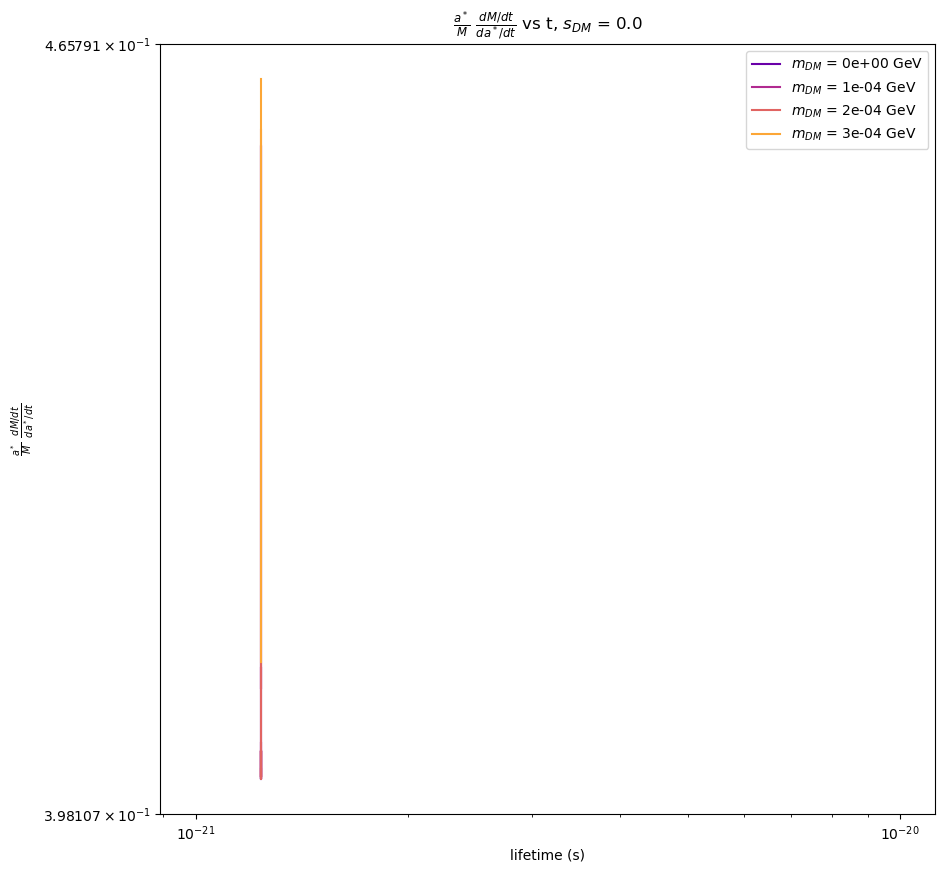

In [5]:
current_dir  = os.getcwd()
main_folder_path = os.path.join(current_dir + '/src/tables/fM_tables/Spin1.0')
output_folder = os.path.join(current_dir +'/spin01_mass')
destination_folder = os.path.join(current_dir +'/src/tables/fM_tables')
fM_file_name = 'fM_add0.txt'
gM_file_name = 'gM_add0.txt'
filepath_fM = destination_folder + '/' + fM_file_name
filepath_gM = destination_folder + '/' + gM_file_name


gev_to_g = 5.60958884e+23
colors = plt.cm.plasma(np.linspace(0, 1, len(mdm_values)))



# anything higher than 2e-4 sheds ang mom before particle is introduced
fig, ax = plt.subplots()
mdm_list = [f for f in os.listdir(main_folder_path)]
mdm_list.sort()
for mdm_n, i in enumerate(mdm_list):
    if i != ".DS_Store":
        mass_folder =  os.path.join(output_folder + '/{:.1e}'.format(float(i)))
        os.makedirs(mass_folder, exist_ok=True)
        dof_list = sort_scientific_folders(main_folder_path + "/{}".format(i))

        a_max = []
        t_max = []
        loop = 0
        for j in dof_list:
            print(j)
            if j != ".DS_Store":

                dof_folder =  os.path.join(output_folder + '/{:.1e}'.format(float(i)) + '/{:.1e}'.format(float(j)))
                os.makedirs(dof_folder, exist_ok=True)

                print("\n **************** {} ****************".format(('Mass','DoF')))
                print("**************** {} **************** \n ".format((i,j)))
                move_text_file(os.path.join(main_folder_path + "/{}".format(i)+ "/{}".format(j)), destination_folder, fM_file_name )
                move_text_file(os.path.join(main_folder_path + "/{}".format(i)+ "/{}".format(j)), destination_folder, gM_file_name )

                fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a') 
                gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a') 
                header = fMdata.columns
                header = [float(a) for a in header]
                data_file = [f for f in os.listdir(output_folder + '/{:.1e}'.format(float(i)) + "/{:.1e}".format(float(j))) if f.endswith('.txt')]
                
                #Moves fM, gM into fM folder, then need to extract parameters from this table 
                for n,file in enumerate(data_file):

                    file_path = os.path.join( output_folder + '/{:.1e}'.format(float(i)) + "/{:.1e}".format(float(j)) , file)
                    data = pd.read_csv(file_path,skipinitialspace=True, delimiter =' ', header=0 )
                    # Assume the data has two columns: 'x' and 'y'
                    dadt = []
                    dMdt = []
                    output= [(a,b,c) for a,b,c in zip(data['a'],data['M'], data['t'])]

                    a_change = []
                    t_change = []
                    for x in output:
                        closest_a = closest_value(header, x[0])
                        closest_m = closest_value(gMdata.index,gev_to_g*x[1])
                        cellf = fMdata.loc[closest_m, "{:.5e}".format(closest_a)]
                        cellg = gMdata.loc[closest_m, "{:.5e}".format(closest_a)]
                        dadt = (2*cellf-cellg)/x[1]**3
                        dMdt = -cellf/x[1]**3
                        t_change.append(x[2])
                        a_change.append(dMdt/dadt)



                    a_max.append(max(a_change))
                    index = a_change.index(max(a_change))
                    t_max.append(time[index])


                move_text_file(destination_folder, os.path.join(main_folder_path + "/{}".format(i)+ "/{}".format(j)), fM_file_name )
                move_text_file(destination_folder, os.path.join(main_folder_path + "/{}".format(i)+ "/{}".format(j)), gM_file_name )
        print(a_max)

        ax.plot(t_max, a_max, label = '$m_{DM}$' + ' = {} GeV'.format(i), color = colors[ mdm_n % len(colors)]) 
        # ax.plot(t_max, a_max, label = '$m_{DM}$' + ' = {} GeV'.format(i), color = colors[ mdm_n % len(colors)], linestyle = 'none', marker = '.') 


ax.set_title('$\\frac{a^*}{M} \ \\frac{dM/dt}{da^*/dt}$ vs t, $s_{DM}$ = 0.0')
ax.set_yscale('symlog')
ax.set_xscale('log')
ax.set_ylabel('$\\frac{a^*}{M} \  \\frac{dM/dt}{da^*/dt}$')
ax.set_xlabel('lifetime (s)')
# a.hlines(1,1e26,1e28)

plt.legend()
plt.gcf().set_size_inches(10, 10)

                # print("\n ****************************************** \n\n")


                # new_filename =  dof_folder + "/Kerr_a0.8_{}M".format(i) +"_{}dof.txt".format(j)
            

1.0e+00
1

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+00') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
[0.58080235978151]
0
time 2.15747e+20
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+00
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+00
1.0e+01
2

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+01') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
[0.58080235978151, 0.6190051521817315]
1
time 2.15747e+20
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+01
Mov

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2284240782.py:62: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2284240782.py:63: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2284240782.py:62: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

[0.58080235978151, 0.6190051521817315, 4.802103653714344]
2
time 2.07117e+23
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+02
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+02
1.0e+03
4

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+03') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
[0.58080235978151, 0.6190051521817315, 4.802103653714344, 1578.9905660378101]
3
time 2.3623e+22
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+03
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+03
1.0e+04
5

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+04') *********

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2284240782.py:62: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2284240782.py:63: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2284240782.py:62: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

[0.58080235978151, 0.6190051521817315, 4.802103653714344, 1578.9905660378101, 131.00165975103516, 320.4390243902609]
3
time 2.3623e+22
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+05
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+05
1.0e+07
1.0e+00
1

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+00') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
[0.5803321348403883]
0
time 2.15747e+20
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+00
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+00
1.0e+01
2

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+01')

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2284240782.py:62: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2284240782.py:63: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2284240782.py:62: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

[0.5803321348403883, 0.6154898866613994, 5.7538314176245215]
2
time 2.0798e+23
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+02
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+02
1.0e+03
4

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+03') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
[0.5803321348403883, 0.6154898866613994, 5.7538314176245215, 1578.9905660378104]
3
time 2.37858e+22
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+03
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+03
1.0e+04
5

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+04') ***

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2284240782.py:62: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2284240782.py:63: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2284240782.py:62: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

[0.5803321348403883, 0.6154898866613994, 5.7538314176245215, 1578.9905660378104, 112.62955032119733, 281.54821428571427]
3
time 2.37858e+22
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+05
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+05
1.0e+07
1.0e+00
1

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+00') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
[0.5781556258001653]
0
time 2.15747e+20
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+00
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+00
1.0e+01
2

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2284240782.py:62: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2284240782.py:63: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2284240782.py:62: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

[0.5781556258001653, 0.5991728910572314, 6.516176255306691]
2
time 2.15747e+23
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+02
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+02
1.0e+03
4

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+03') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
[0.5781556258001653, 0.5991728910572314, 6.516176255306691, 1578.9905660378104]
3
time 2.48655e+22
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+03
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+03
1.0e+04
5

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+04') ****

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2284240782.py:62: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2284240782.py:63: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2284240782.py:62: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

[0.5781556258001653, 0.5991728910572314, 6.516176255306691, 1578.9905660378104, 85.7432138979387, 265.4646464646636]
3
time 2.48655e+22
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+05
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+05
1.0e+07
1.0e+00
1

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+00') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
[0.5750168820123923]
0
time 3.45195e+21
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+00
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+00
1.0e+01
2

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+01'

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2284240782.py:62: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2284240782.py:63: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2284240782.py:62: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

[0.5750168820123923, 0.5763724090294928, 6.4463674259341985]
2
time 2.31281e+23
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+02
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+02
1.0e+03
4

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+03') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
[0.5750168820123923, 0.5763724090294928, 6.4463674259341985, 1578.9905660378104]
3
time 2.73494e+22
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+03
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+03
1.0e+04
5

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+04') **

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2284240782.py:62: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2284240782.py:63: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2284240782.py:62: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

[0.5750168820123923, 0.5763724090294928, 6.4463674259341985, 1578.9905660378104, 75.40496657115587, 264.57382550336433]
3
time 2.73494e+22
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+05
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+05
1.0e+07
[]


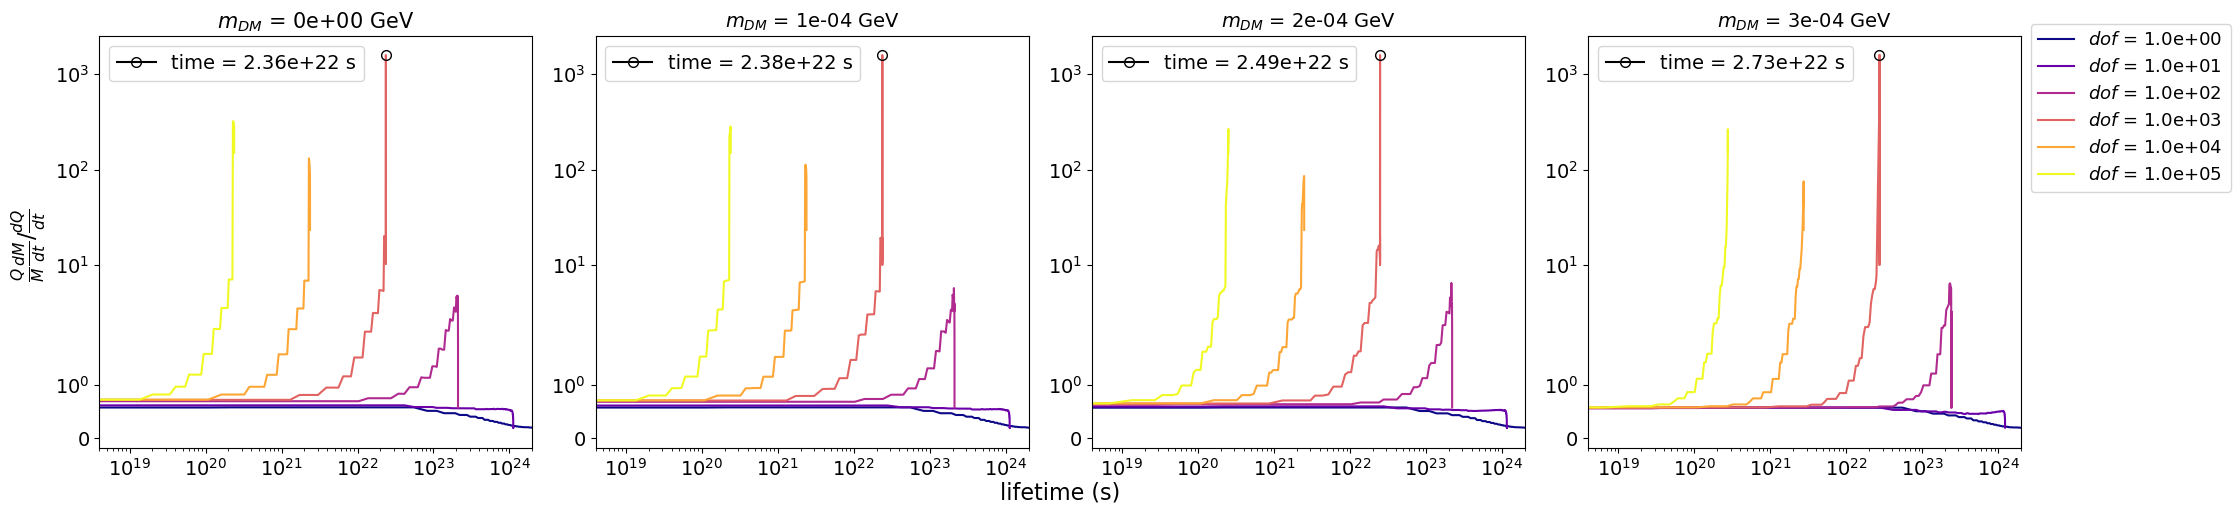

In [157]:
current_dir  = os.getcwd()
main_folder_path = os.path.join(current_dir + '/src/tables/fM_tables/Spin0.0')
output_folder = os.path.join(current_dir +'/spin00_mass')
destination_folder = os.path.join(current_dir +'/src/tables/fM_tables')
fM_file_name = 'fM_add0.txt'
gM_file_name = 'gM_add0.txt'
filepath_fM = destination_folder + '/' + fM_file_name
filepath_gM = destination_folder + '/' + gM_file_name

mdm_values = [0e+0, 1e-4,2e-4, 3e-4] 
# dof_values = [1e01,1e2,1e3,1e4,1e05,1e7,1e9,1e11,1e12,1e15,1e20,1e25,1e30,1e40,1e50]
dof_values = [0e0,1e01,1e2,1e3,1e4,1e5]
gev_to_g = 5.60958884e+23
# color_maps =['plasma', 'viridis', 'Spectral','cividis']
color_maps =['plasma', 'plasma', 'plasma','plasma']


colors = []
for cmap_name in color_maps:
    cmap = getattr(plt.cm, cmap_name)  # Get colormap dynamically
    color = cmap(np.linspace(0, 1, len(dof_values)))  # Apply colormap
    colors.append(color)



# anything higher than 2e-4 sheds ang mom before particle is introduced
fig, ax = plt.subplots(1, 4, figsize=(20, 5))  # 2x2 subplots
ax = ax.flatten() 
mdm_list = [f for f in os.listdir(main_folder_path)]
mdm_list.sort()
legend2 = []
for mdm_n, i in enumerate(mdm_list):

    if i != ".DS_Store":
        mdm_n = mdm_n-1
        mass_folder =  os.path.join(output_folder + '/{:.1e}'.format(float(i)))
        os.makedirs(mass_folder, exist_ok=True)
        dof_list = sort_scientific_folders(main_folder_path + "/{}".format(i))

        a_max = []
        t_max = []
        loop = 1
        maximum = []
        maximum_t = []
        for dof_n, j in enumerate(dof_list):
            print(j)
            if j != ".DS_Store":

                if loop > len(dof_values):
                    break
                else:
                    print(loop)
                    loop += 1
                    dof_folder =  os.path.join(output_folder + '/{:.1e}'.format(float(i)) + '/{:.1e}'.format(float(j)))
                    os.makedirs(dof_folder, exist_ok=True)

                    print("\n **************** {} ****************".format(('Mass','DoF')))
                    print("**************** {} **************** \n ".format((i,j)))
                    move_text_file(os.path.join(main_folder_path + "/{}".format(i)+ "/{}".format(j)), destination_folder, fM_file_name )
                    move_text_file(os.path.join(main_folder_path + "/{}".format(i)+ "/{}".format(j)), destination_folder, gM_file_name )

                    fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a') 
                    gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a') 
                    header = fMdata.columns
                    header = [float(a) for a in header]
                    data_file = [f for f in os.listdir(output_folder + '/{:.1e}'.format(float(i)) + "/{:.1e}".format(float(j))) if f.endswith('.txt')]
                    
                    #Moves fM, gM into fM folder, then need to extract parameters from this table 
                    for n,file in enumerate(data_file):

                        file_path = os.path.join( output_folder + '/{:.1e}'.format(float(i)) + "/{:.1e}".format(float(j)) , file)
                        data = pd.read_csv(file_path,skipinitialspace=True, delimiter =' ', header=0 )
                        # Assume the data has two columns: 'x' and 'y'
                        dadt = []
                        dMdt = []
                        output= [(a,b,c) for a,b,c in zip(data['a'],data['M'], data['t'])]
                        a_change = []
                        t_change = []
                        for x in output:
                            closest_a = closest_value(header, x[0])
                            closest_m = closest_value(gMdata.index,gev_to_g*x[1])
                            cellf = fMdata.loc[closest_m, "{:.5e}".format(closest_a)]
                            cellg = gMdata.loc[closest_m, "{:.5e}".format(closest_a)]
                            dadt = (2*cellf-cellg)/x[1]**3
                            dMdt = -cellf/x[1]**3
                            if dMdt/dadt > 0:
                                t_change.append(x[2])
                                a_change.append(dMdt/dadt)
                    max_index = a_change.index(max(a_change))

                    # Append the maximum value and corresponding time to the lists
                    maximum.append(max(a_change))
                    maximum_t.append(t_change[max_index])

                    # If you want to get the index of the maximum value from the 'maximum' list
                    t_ind = maximum.index(max(maximum))

                    print(maximum)
                    print(t_ind)
                    print('time {}'.format(maximum_t[t_ind]))



                    move_text_file(destination_folder, os.path.join(main_folder_path + "/{}".format(i)+ "/{}".format(j)), fM_file_name )
                    move_text_file(destination_folder, os.path.join(main_folder_path + "/{}".format(i)+ "/{}".format(j)), gM_file_name )
                    
                    if mdm_n == 0:
                        ax[mdm_n].plot(t_change, a_change, label = '$dof$' + ' = {} '.format(j), color = colors[mdm_n][ dof_n % len(colors[mdm_n])]) 
                        ax[mdm_n].set_title(f'$m_{{DM}}$ = {i} GeV', fontsize = legendsize)
                        ax[mdm_n].set_yscale('symlog')
                        ax[mdm_n].set_xscale('log')
                        ax[mdm_n].set_xlim(4e18,2e24)
                        # ax[mdm_n].plot(maximum_t[t_ind], marker = 'none')
                        # ax[mdm_n].set_ylabel('$\\frac{a^*}{M} \\frac{dM/dt}{da^*/dt}$', fontsize = textsize)
                        # ax[mdm_n].set_xlabel('lifetime (s)', fontsize = textsize)

                    else:
                        ax[mdm_n].plot(t_change, a_change, color = colors[mdm_n][ dof_n % len(colors[mdm_n])]) 

                        ax[mdm_n].set_title(f'$m_{{DM}}$ = {i} GeV', fontsize = 14)
                        ax[mdm_n].set_yscale('symlog')
                        ax[mdm_n].set_xscale('log')
                        


                        # ax[mdm_n].legend(handles = line1, fontsize =legendsize )
                        # ax[mdm_n].set_ylabel('$\\frac{a^*}{M} \\frac{dM/dt}{da^*/dt}$', fontsize = textsize)
                        # ax[mdm_n].set_xlabel('lifetime (s)' , fontsize = textsize)
                        ax[mdm_n].set_xlim(4e18,2e24)
                    ax[mdm_n].tick_params(axis='x', labelsize=14)  # For x-axis tick labels
                    ax[mdm_n].tick_params(axis='y', labelsize=14) 

        line1, = ax[mdm_n].plot(maximum_t[t_ind], max(maximum), marker = 'o',color = 'black', markersize = 7, fillstyle='none')
        ax[mdm_n].legend(handles = [line1], labels = ["time = "+ "{:.3} s".format(maximum_t[t_ind]) ], loc = 'upper left', fontsize = 14 )
print(legend2)

fig.text(0.51, -0.008, 'lifetime (s)', ha='center', fontsize=16)
fig.text(-0.015, 0.50, '$ \\frac{Q}{M}\\frac{dM}{dt} / \\frac{dQ}{dt}$' , va='center', rotation='vertical', fontsize=16)
fig.legend(fontsize=13, loc='upper right', bbox_to_anchor=(1.1, 0.96))

# fig.legend(fontsize=legendsize, loc='center right', bbox_to_anchor=(1, 1.5))
  # Moves legend outside the right side
plt.tight_layout(rect=[0.0, 0, 1, 1])  # Adjust layout to fit the legend

# fig.suptitle('Spin 0 DM', fontsize=16)

plt.show()

            

Included All DOF values

1.0e+01
1

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+01') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+01
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+01
1.0e+02
1

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+02') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+02
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+03
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+03
1.0e+04
1

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+04') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+04
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+04
1.0e+05
1

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+05') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+07
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+07
1.0e+09
1

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+09') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+09
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+09
1.0e+11
1

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+11') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+12
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+12
1.0e+15
1

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+15') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+15
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+15
1.0e+20
1

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+20') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+25
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+25
1.0e+30
1

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+30') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+30
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+30
1.0e+40
1

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+40') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+45
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+45
1.0e+50
1

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+50') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+50
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+50
1.0e+60
1

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+60') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+80
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+80
1.0e+100
1

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+100') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+100
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+100
1.0e+200
1

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+200') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+01
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+01
1.0e+02
1

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+02') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+02
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+02
1.0e+03
1

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+03') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+04
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+04
1.0e+05
1

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+05') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+05
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+05
1.0e+07
1

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+07') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+09
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+09
1.0e+11
1

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+11') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+11
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+11
1.0e+12
1

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+12') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+15
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+15
1.0e+20
1

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+20') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+20
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+20
1.0e+25
1

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+25') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+30
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+30
1.0e+40
1

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+40') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+40
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+40
1.0e+45
1

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+45') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+50
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+50
1.0e+60
1

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+60') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+60
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+60
1.0e+80
1

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+80') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+100
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+100
1.0e+200
1

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+200') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+200
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+200
1.0e+01
1

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+01') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+03
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+03
1.0e+04
1

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+04') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+04
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+04
1.0e+05
1

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+05') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+07
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+07
1.0e+09
1

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+09') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+09
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+09
1.0e+11
1

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+11') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+12
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+12
1.0e+15
1

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+15') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+15
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+15
1.0e+20
1

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+20') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+25
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+25
1.0e+30
1

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+30') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+30
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+30
1.0e+40
1

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+40') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+45
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+45
1.0e+50
1

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+50') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+50
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+50
1.0e+60
1

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+60') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+80
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+80
1.0e+100
1

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+100') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+100
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+100
1.0e+200
1

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+200') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+01
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+01
1.0e+02
1

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+02') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+02
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+02
1.0e+03
1

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+03') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+04
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+04
1.0e+05
1

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+05') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+05
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+05
1.0e+07
1

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+07') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+09
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+09
1.0e+11
1

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+11') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+11
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+11
1.0e+15
1

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+15') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+20
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+20
1.0e+25
1

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+25') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+25
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+25
1.0e+30
1

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+30') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+40
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+40
1.0e+45
1

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+45') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+45
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+45
1.0e+50
1

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+50') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+60
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+60
1.0e+80
1

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+80') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+80
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+80
1.0e+100
1

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+100') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2824439302.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

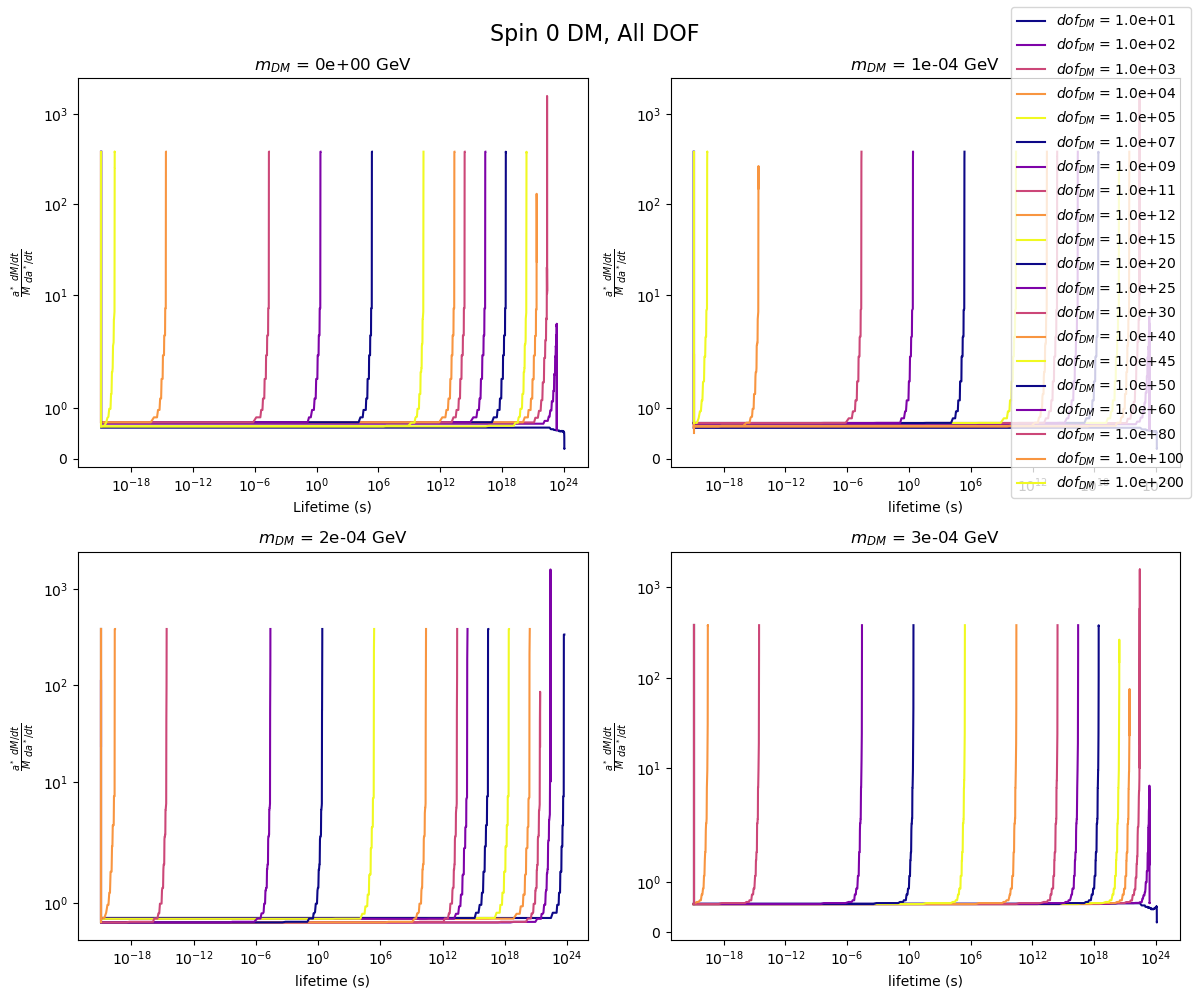

In [17]:
current_dir  = os.getcwd()
main_folder_path = os.path.join(current_dir + '/src/tables/fM_tables/Spin0.0')
output_folder = os.path.join(current_dir +'/spin00_mass')
destination_folder = os.path.join(current_dir +'/src/tables/fM_tables')
fM_file_name = 'fM_add0.txt'
gM_file_name = 'gM_add0.txt'
filepath_fM = destination_folder + '/' + fM_file_name
filepath_gM = destination_folder + '/' + gM_file_name

mdm_values = [0e+0, 1e-4,2e-4, 3e-4] 
# dof_values = [1e01,1e2,1e3,1e4,1e05,1e7,1e9,1e11,1e12,1e15,1e20,1e25,1e30,1e40,1e50]
dof_values = [1e01,1e2,1e3,1e4,1e05]
gev_to_g = 5.60958884e+23
# color_maps =['plasma', 'viridis', 'Spectral','cividis']
color_maps =['plasma', 'plasma', 'plasma','plasma']

colors = []
for cmap_name in color_maps:
    cmap = getattr(plt.cm, cmap_name)  # Get colormap dynamically
    color = cmap(np.linspace(0, 1, len(dof_values)))  # Apply colormap
    colors.append(color)



# anything higher than 2e-4 sheds ang mom before particle is introduced
fig, ax = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 subplots
ax = ax.flatten() 
mdm_list = [f for f in os.listdir(main_folder_path)]
mdm_list.sort()
for mdm_n, i in enumerate(mdm_list):

    if i != ".DS_Store":
        mdm_n = mdm_n-1
        mass_folder =  os.path.join(output_folder + '/{:.1e}'.format(float(i)))
        os.makedirs(mass_folder, exist_ok=True)
        dof_list = sort_scientific_folders(main_folder_path + "/{}".format(i))

        a_max = []
        t_max = []
        loop = 1

        for dof_n, j in enumerate(dof_list):
            print(j)
            if j != ".DS_Store":

                if loop > len(dof_values):
                    break
                else:
                    print(loop)
                    loop += 0
                    dof_folder =  os.path.join(output_folder + '/{:.1e}'.format(float(i)) + '/{:.1e}'.format(float(j)))
                    os.makedirs(dof_folder, exist_ok=True)

                    print("\n **************** {} ****************".format(('Mass','DoF')))
                    print("**************** {} **************** \n ".format((i,j)))
                    move_text_file(os.path.join(main_folder_path + "/{}".format(i)+ "/{}".format(j)), destination_folder, fM_file_name )
                    move_text_file(os.path.join(main_folder_path + "/{}".format(i)+ "/{}".format(j)), destination_folder, gM_file_name )

                    fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a') 
                    gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a') 
                    header = fMdata.columns
                    header = [float(a) for a in header]
                    data_file = [f for f in os.listdir(output_folder + '/{:.1e}'.format(float(i)) + "/{:.1e}".format(float(j))) if f.endswith('.txt')]
                    
                    #Moves fM, gM into fM folder, then need to extract parameters from this table 
                    for n,file in enumerate(data_file):

                        file_path = os.path.join( output_folder + '/{:.1e}'.format(float(i)) + "/{:.1e}".format(float(j)) , file)
                        data = pd.read_csv(file_path,skipinitialspace=True, delimiter =' ', header=0 )
                        # Assume the data has two columns: 'x' and 'y'
                        dadt = []
                        dMdt = []
                        output= [(a,b,c) for a,b,c in zip(data['a'],data['M'], data['t'])]
                        a_change = []
                        t_change = []
                        for x in output:
                            closest_a = closest_value(header, x[0])
                            closest_m = closest_value(gMdata.index,gev_to_g*x[1])
                            cellf = fMdata.loc[closest_m, "{:.5e}".format(closest_a)]
                            cellg = gMdata.loc[closest_m, "{:.5e}".format(closest_a)]
                            dadt = (2*cellf-cellg)/x[1]**3
                            dMdt = -cellf/x[1]**3
                            if dMdt/dadt > -1:
                                t_change.append(x[2])
                                a_change.append(dMdt/dadt)



                    move_text_file(destination_folder, os.path.join(main_folder_path + "/{}".format(i)+ "/{}".format(j)), fM_file_name )
                    move_text_file(destination_folder, os.path.join(main_folder_path + "/{}".format(i)+ "/{}".format(j)), gM_file_name )

                    if mdm_n == 0:
                        ax[mdm_n].plot(t_change, a_change, label = '$dof_{DM}$' + ' = {} '.format(j), color = colors[mdm_n][ dof_n % len(colors[mdm_n])]) 
                        ax[mdm_n].set_title(f'$m_{{DM}}$ = {i} GeV', fontsize = textsize)
                        ax[mdm_n].set_yscale('symlog')
                        ax[mdm_n].set_xscale('log')
                        ax[mdm_n].set_ylabel('$\\frac{a^*}{M} \\frac{dM/dt}{da^*/dt}$', fontsize = textsize)
                        ax[mdm_n].set_xlabel('lifetime (s)', fontsize = textsize)
                    else:
                        ax[mdm_n].plot(t_change, a_change, color = colors[mdm_n][ dof_n % len(colors[mdm_n])]) 
                        ax[mdm_n].set_title(f'$m_{{DM}}$ = {i} GeV', fontsize = textsize)
                        ax[mdm_n].set_yscale('symlog')
                        ax[mdm_n].set_xscale('log')
                        ax[mdm_n].set_ylabel('$\\frac{a^*}{M} \\frac{dM/dt}{da^*/dt}$', fontsize = textsize)
                        ax[mdm_n].set_xlabel('lifetime (s)', fontsize = textsize)
                    # ax[mdm_n].set_xlim(4e18,2e24)
fig.legend(, fontsize = legendsize)

# fig.suptitle('Spin 0 DM, All DOF', fontsize=16)

plt.tight_layout()
plt.show()

            

1.0e+01

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+01') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+01
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+01
1.0e+02

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+02') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+02
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:49: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+03
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+03
1.0e+04

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+04') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+04
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+04
1.0e+05

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+05') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:49: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+07
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+07
1.0e+09

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+09') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+09
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+09
1.0e+11

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+11') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:49: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+12
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+12
1.0e+15

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+15') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+15
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+15
1.0e+20

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+20') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:49: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+25
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+25
1.0e+30

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+30') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+30
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+30
1.0e+40

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+40') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:49: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+45
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+45
1.0e+50

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+50') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+50
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+50
1.0e+60

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+60') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:49: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+80
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+80
1.0e+100

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+100') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+100
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/0e+00/1.0e+100
1.0e+01

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+01') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:49: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+02
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+02
1.0e+03

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+03') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+03
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+03
1.0e+04

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+04') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:49: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+05
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+05
1.0e+07

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+07') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+07
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+07
1.0e+09

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+09') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:49: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+11
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+11
1.0e+12

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+12') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+12
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+12
1.0e+15

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+15') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:49: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+20
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+20
1.0e+25

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+25') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+25
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+25
1.0e+30

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+30') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:49: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+40
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+40
1.0e+45

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+45') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+45
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+45
1.0e+50

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+50') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:49: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+60
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+60
1.0e+80

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+80') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+80
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/1e-04/1.0e+80
1.0e+100

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+100') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_t

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:49: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+01
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+01
1.0e+02

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+02') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+02
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+02
1.0e+03

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+03') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:49: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+04
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+04
1.0e+05

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+05') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+05
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+05
1.0e+07

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+07') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:49: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+09
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+09
1.0e+11

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+11') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+11
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+11
1.0e+12

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+12') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:49: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+15
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+15
1.0e+20

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+20') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+20
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+20
1.0e+25

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+25') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:49: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+30
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+30
1.0e+40

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+40') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+40
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+40
1.0e+45

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+45') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:49: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+50
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+50
1.0e+60

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+60') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+60
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+60
1.0e+80

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+80') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:49: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+100
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/2e-04/1.0e+100
1.0e+01

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+01') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+01
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+01
1.0e+02

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+02') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_t

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:49: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+03
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+03
1.0e+04

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+04') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+04
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+04
1.0e+05

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+05') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:49: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+07
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+07
1.0e+09

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+09') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+09
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+09
1.0e+11

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+11') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:49: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+15
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+15
1.0e+20

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+20') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+20
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+20
1.0e+25

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+25') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:49: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+30
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+30
1.0e+40

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+40') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+40
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+40
1.0e+45

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+45') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:49: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+50
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+50
1.0e+60

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+60') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+60
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+60
1.0e+80

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+80') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tab

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:49: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2841421374.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+100
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.0/3e-04/1.0e+100


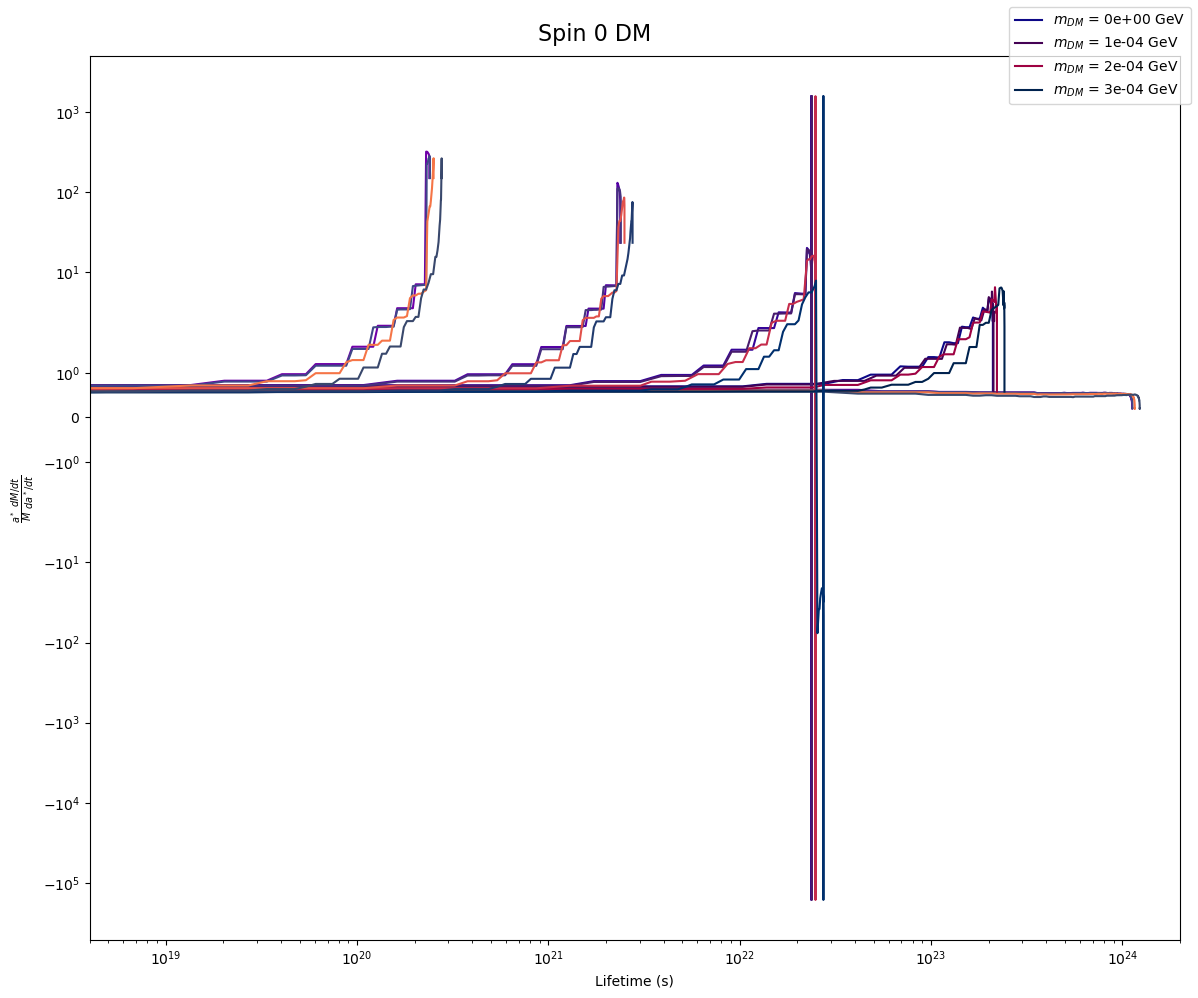

In [8]:
current_dir  = os.getcwd()
main_folder_path = os.path.join(current_dir + '/src/tables/fM_tables/Spin0.0')
output_folder = os.path.join(current_dir +'/spin00_mass')
destination_folder = os.path.join(current_dir +'/src/tables/fM_tables')
fM_file_name = 'fM_add0.txt'
gM_file_name = 'gM_add0.txt'
filepath_fM = destination_folder + '/' + fM_file_name
filepath_gM = destination_folder + '/' + gM_file_name

mdm_values = [0e+0, 1e-4,2e-4, 3e-4] 
dof_values = [1e01,1e2,1e3,1e4,1e05,1e7,1e9,1e11,1e12,1e15,1e20,1e25,1e30,1e40,1e50]
gev_to_g = 5.60958884e+23
color_maps =['plasma', 'viridis', 'Spectral','cividis']

colors = []
for cmap_name in color_maps:
    cmap = getattr(plt.cm, cmap_name)  # Get colormap dynamically
    color = cmap(np.linspace(0, 1, len(dof_values)))  # Apply colormap
    colors.append(color)

# anything higher than 2e-4 sheds ang mom before particle is introduced
fig, ax = plt.subplots(figsize=(12, 10))  # 2x2 subplots
mdm_list = [f for f in os.listdir(main_folder_path)]
mdm_list.sort()
for mdm_n, i in enumerate(mdm_list):

    if i != ".DS_Store":
        mdm_n = mdm_n-1
        mass_folder =  os.path.join(output_folder + '/{:.1e}'.format(float(i)))
        os.makedirs(mass_folder, exist_ok=True)
        dof_list = sort_scientific_folders(main_folder_path + "/{}".format(i))

        a_max = []
        t_max = []
        loop = 0
        for dof_n, j in enumerate(dof_list):
            print(j)
            if j != ".DS_Store":
                dof_n += -1 
                dof_folder =  os.path.join(output_folder + '/{:.1e}'.format(float(i)) + '/{:.1e}'.format(float(j)))
                os.makedirs(dof_folder, exist_ok=True)

                print("\n **************** {} ****************".format(('Mass','DoF')))
                print("**************** {} **************** \n ".format((i,j)))
                move_text_file(os.path.join(main_folder_path + "/{}".format(i)+ "/{}".format(j)), destination_folder, fM_file_name )
                move_text_file(os.path.join(main_folder_path + "/{}".format(i)+ "/{}".format(j)), destination_folder, gM_file_name )

                fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a') 
                gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a') 
                header = fMdata.columns
                header = [float(a) for a in header]
                data_file = [f for f in os.listdir(output_folder + '/{:.1e}'.format(float(i)) + "/{:.1e}".format(float(j))) if f.endswith('.txt')]
                
                #Moves fM, gM into fM folder, then need to extract parameters from this table 
                for n,file in enumerate(data_file):

                    file_path = os.path.join( output_folder + '/{:.1e}'.format(float(i)) + "/{:.1e}".format(float(j)) , file)
                    data = pd.read_csv(file_path,skipinitialspace=True, delimiter =' ', header=0 )
                    # Assume the data has two columns: 'x' and 'y'
                    dadt = []
                    dMdt = []
                    output= [(a,b,c) for a,b,c in zip(data['a'],data['M'], data['t'])]
                    a_change = []
                    t_change = []
                    for x in output:
                        closest_a = closest_value(header, x[0])
                        closest_m = closest_value(gMdata.index,gev_to_g*x[1])
                        cellf = fMdata.loc[closest_m, "{:.5e}".format(closest_a)]
                        cellg = gMdata.loc[closest_m, "{:.5e}".format(closest_a)]
                        dadt = (2*cellf-cellg)/x[1]**3
                        dMdt = -cellf/x[1]**3
                    
                        t_change.append(x[2])
                        a_change.append(dMdt/dadt)



                move_text_file(destination_folder, os.path.join(main_folder_path + "/{}".format(i)+ "/{}".format(j)), fM_file_name )
                move_text_file(destination_folder, os.path.join(main_folder_path + "/{}".format(i)+ "/{}".format(j)), gM_file_name )

                if dof_n == 0:
                    ax.plot(t_change, a_change, label = '$m_{DM}$' + ' = {} GeV'.format(i), color = colors[mdm_n][dof_n % len(colors)]) 
                    # ax.set_title(f'$m_{{DM}}$ = {i} GeV')
                    ax.set_yscale('symlog')
                    ax.set_xscale('log')
                    ax.set_ylabel('$\\frac{a^*}{M} \\frac{dM/dt}{da^*/dt}$')
                    ax.set_xlabel('Lifetime (s)')
                else:
                
                    ax.plot(t_change, a_change, color = colors[mdm_n][ dof_n % len(colors)]) 
                    # ax.set_title(f'$m_{{DM}}$ = {i} GeV')
                    ax.set_yscale('symlog')
                    ax.set_xscale('log')
                    ax.set_ylabel('$\\frac{a^*}{M} \\frac{dM/dt}{da^*/dt}$')
                    ax.set_xlabel('Lifetime (s)')
ax.set_xlim(4e18,2e24)
fig.suptitle('Spin 0 DM', fontsize=16)
fig.legend()
plt.tight_layout()
plt.show()

            

1.0e+01
1

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+01') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/0e+00/1.0e+01
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/0e+00/1.0e+01
1.0e+02
2

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+02') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/0e+00/1.0e+02
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/0e+00/

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/893071048.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/893071048.py:61: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/893071048.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/0e+00/1.0e+03
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/0e+00/1.0e+03
1.0e+04
4

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+04') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/0e+00/1.0e+04
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/0e+00/1.0e+04
1.0e+05
5

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+05') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/893071048.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/893071048.py:61: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/893071048.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

1.0e+07
1.0e+01
1

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+01') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/1e-04/1.0e+01
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/1e-04/1.0e+01
1.0e+02
2

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+02') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/1e-04/1.0e+02
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/893071048.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/893071048.py:61: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/893071048.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/1e-04/1.0e+03
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/1e-04/1.0e+03
1.0e+04
4

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+04') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/1e-04/1.0e+04
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/1e-04/1.0e+04
1.0e+05
5

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+05') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/893071048.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/893071048.py:61: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/893071048.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/2e-04/1.0e+01
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/2e-04/1.0e+01
1.0e+02
2

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+02') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/2e-04/1.0e+02
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/2e-04/1.0e+02
1.0e+03
3

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+03') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/893071048.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/893071048.py:61: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/893071048.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/2e-04/1.0e+04
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/2e-04/1.0e+04
1.0e+05
5

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+05') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/2e-04/1.0e+05
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/2e-04/1.0e+05
1.0e+07
1.0e+01
1

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+01') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/t

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/893071048.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/893071048.py:61: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/893071048.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/3e-04/1.0e+02
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/3e-04/1.0e+02
1.0e+03
3

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+03') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/3e-04/1.0e+03
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/3e-04/1.0e+03
1.0e+04
4

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+04') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/893071048.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/893071048.py:61: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/893071048.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/3e-04/1.0e+05
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin0.5/3e-04/1.0e+05
1.0e+07


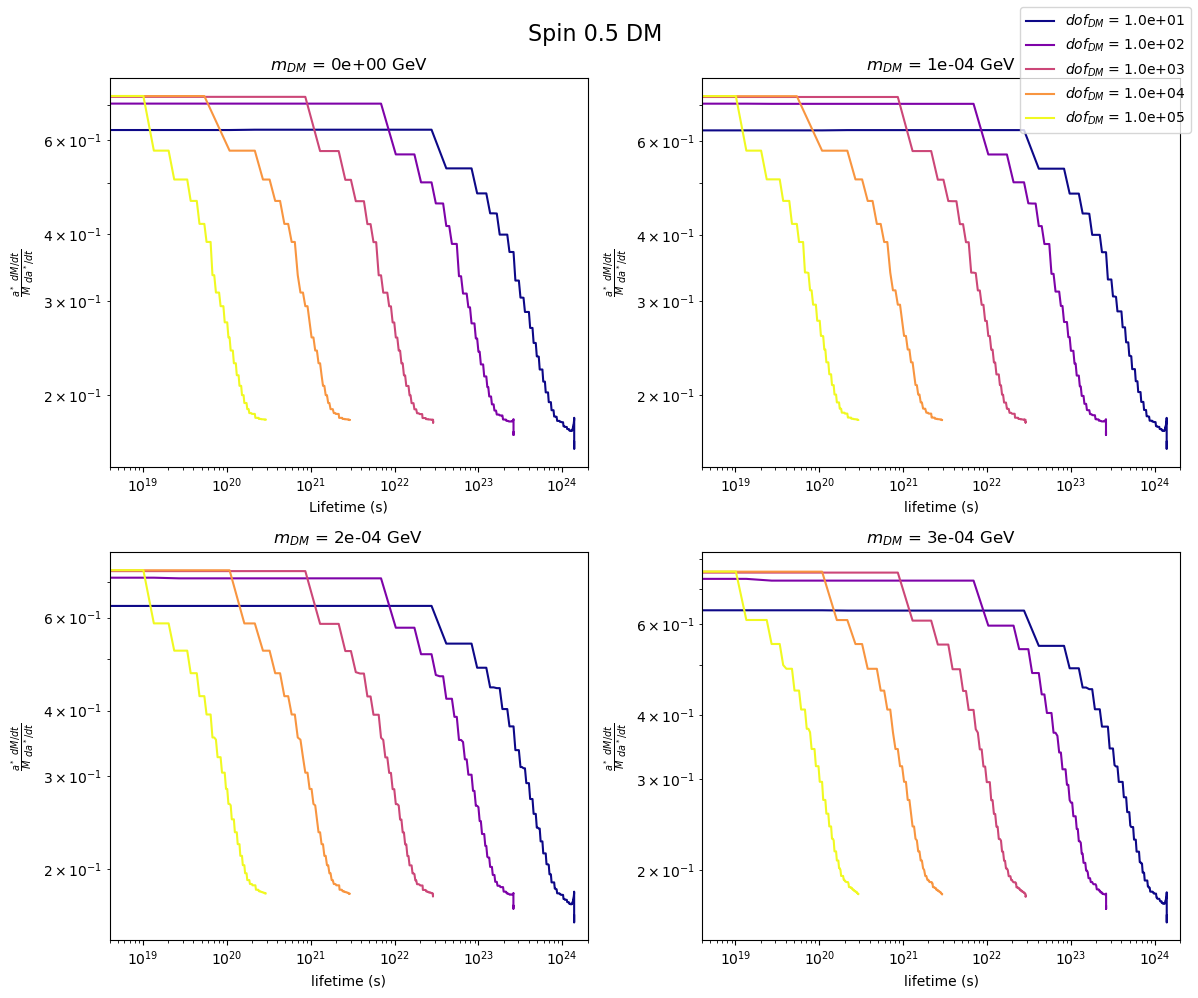

In [9]:
current_dir  = os.getcwd()
main_folder_path = os.path.join(current_dir + '/src/tables/fM_tables/Spin0.5')
output_folder = os.path.join(current_dir +'/spin05_mass')
destination_folder = os.path.join(current_dir +'/src/tables/fM_tables')
fM_file_name = 'fM_add0.txt'
gM_file_name = 'gM_add0.txt'
filepath_fM = destination_folder + '/' + fM_file_name
filepath_gM = destination_folder + '/' + gM_file_name

mdm_values = [0e+0, 1e-4,2e-4, 3e-4] 
# dof_values = [1e01,1e2,1e3,1e4,1e05,1e7,1e9,1e11,1e12,1e15,1e20,1e25,1e30,1e40,1e50]
dof_values = [1e01,1e2,1e3,1e4,1e05]
gev_to_g = 5.60958884e+23
# color_maps =['plasma', 'viridis', 'Spectral','cividis']
color_maps =['plasma', 'plasma', 'plasma','plasma']

colors = []
for cmap_name in color_maps:
    cmap = getattr(plt.cm, cmap_name)  # Get colormap dynamically
    color = cmap(np.linspace(0, 1, len(dof_values)))  # Apply colormap
    colors.append(color)



# anything higher than 2e-4 sheds ang mom before particle is introduced
fig, ax = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 subplots
ax = ax.flatten() 
mdm_list = [f for f in os.listdir(main_folder_path)]
mdm_list.sort()

for mdm_n, i in enumerate(mdm_list):

    if i != ".DS_Store":
        mdm_n = mdm_n-1
        mass_folder =  os.path.join(output_folder + '/{:.1e}'.format(float(i)))
        os.makedirs(mass_folder, exist_ok=True)
        dof_list = sort_scientific_folders(main_folder_path + "/{}".format(i))

        a_max = []
        t_max = []
        loop = 1

        for dof_n, j in enumerate(dof_list):
            print(j)
            if j != ".DS_Store":

                if loop > len(dof_values):
                    break
                else:
                    print(loop)
                    loop += 1
                    dof_folder =  os.path.join(output_folder + '/{:.1e}'.format(float(i)) + '/{:.1e}'.format(float(j)))
                    os.makedirs(dof_folder, exist_ok=True)

                    print("\n **************** {} ****************".format(('Mass','DoF')))
                    print("**************** {} **************** \n ".format((i,j)))
                    move_text_file(os.path.join(main_folder_path + "/{}".format(i)+ "/{}".format(j)), destination_folder, fM_file_name )
                    move_text_file(os.path.join(main_folder_path + "/{}".format(i)+ "/{}".format(j)), destination_folder, gM_file_name )

                    fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a') 
                    gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a') 
                    header = fMdata.columns
                    header = [float(a) for a in header]
                    data_file = [f for f in os.listdir(output_folder + '/{:.1e}'.format(float(i)) + "/{:.1e}".format(float(j))) if f.endswith('.txt')]
                    
                    #Moves fM, gM into fM folder, then need to extract parameters from this table 
                    for n,file in enumerate(data_file):

                        file_path = os.path.join( output_folder + '/{:.1e}'.format(float(i)) + "/{:.1e}".format(float(j)) , file)
                        data = pd.read_csv(file_path,skipinitialspace=True, delimiter =' ', header=0 )
                        # Assume the data has two columns: 'x' and 'y'
                        dadt = []
                        dMdt = []
                        output= [(a,b,c) for a,b,c in zip(data['a'],data['M'], data['t'])]
                        a_change = []
                        t_change = []
                        for x in output:
                            closest_a = closest_value(header, x[0])
                            closest_m = closest_value(gMdata.index,gev_to_g*x[1])
                            cellf = fMdata.loc[closest_m, "{:.5e}".format(closest_a)]
                            cellg = gMdata.loc[closest_m, "{:.5e}".format(closest_a)]
                            dadt = (2*cellf-cellg)/x[1]**3
                            dMdt = -cellf/x[1]**3
                            if dMdt/dadt > 0:
                                t_change.append(x[2])
                                a_change.append(dMdt/dadt)



                    move_text_file(destination_folder, os.path.join(main_folder_path + "/{}".format(i)+ "/{}".format(j)), fM_file_name )
                    move_text_file(destination_folder, os.path.join(main_folder_path + "/{}".format(i)+ "/{}".format(j)), gM_file_name )

                    if mdm_n == 0:
                        ax[mdm_n].plot(t_change, a_change, label = '$dof_{DM}$' + ' = {} '.format(j), color = colors[mdm_n][ dof_n % len(colors[mdm_n])]) 
                        ax[mdm_n].set_title(f'$m_{{DM}}$ = {i} GeV')
                        ax[mdm_n].set_yscale('log')
                        ax[mdm_n].set_xscale('log')
                        ax[mdm_n].set_ylabel('$\\frac{a^*}{M} \\frac{dM/dt}{da^*/dt}$')
                        ax[mdm_n].set_xlabel('Lifetime (s)')
                        ax[mdm_n].set_xlim(4e18,2e24)
                        
                    elif mdm_n >= 4:
                        pass
                    
                    else:
                        ax[mdm_n].plot(t_change, a_change, color = colors[mdm_n][ dof_n % len(colors[mdm_n])]) 
                        ax[mdm_n].set_title(f'$m_{{DM}}$ = {i} GeV')
                        ax[mdm_n].set_yscale('log')
                        ax[mdm_n].set_xscale('log')
                        ax[mdm_n].set_ylabel('$\\frac{a^*}{M} \\frac{dM/dt}{da^*/dt}$')
                        ax[mdm_n].set_xlabel('lifetime (s)')
                        ax[mdm_n].set_xlim(4e18,2e24)
fig.legend()

fig.suptitle('Spin 0.5 DM', fontsize=16)

plt.tight_layout()
plt.show()

            

1.0e+01
1

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+01') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/0e+00/1.0e+01
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/0e+00/1.0e+01
1.0e+02
2

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+02') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables


/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/771775458.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/771775458.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/771775458.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/0e+00/1.0e+02
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/0e+00/1.0e+02
1.0e+03
3

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+03') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/0e+00/1.0e+03
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/0e+00/1.0e+03
1.0e+04
4

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+04') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/771775458.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/771775458.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/771775458.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/0e+00/1.0e+04
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/0e+00/1.0e+04
1.0e+05
5

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+05') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/0e+00/1.0e+05
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/0e+00/1.0e+05
1.0e+07
1.0e+01
1

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+01') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/t

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/771775458.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/771775458.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/771775458.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/1e-04/1.0e+01
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/1e-04/1.0e+01
1.0e+02
2

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+02') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/1e-04/1.0e+02
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/1e-04/1.0e+02
1.0e+03
3

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+03') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/771775458.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/771775458.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/771775458.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/1e-04/1.0e+03
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/1e-04/1.0e+03
1.0e+04
4

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+04') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/1e-04/1.0e+04
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/1e-04/1.0e+04
1.0e+05
5

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+05') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/771775458.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/771775458.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/771775458.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/1e-04/1.0e+05
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/1e-04/1.0e+05
1.0e+07
1.0e+01
1

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+01') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/2e-04/1.0e+01
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/2e-04/1.0e+01
1.0e+02
2

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+02') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/t

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/771775458.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/771775458.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/771775458.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/2e-04/1.0e+02
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/2e-04/1.0e+02
1.0e+03
3

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+03') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/2e-04/1.0e+03
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/2e-04/1.0e+03
1.0e+04
4

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+04') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/771775458.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/771775458.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/771775458.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/2e-04/1.0e+04
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/2e-04/1.0e+04
1.0e+05
5

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+05') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/2e-04/1.0e+05
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/2e-04/1.0e+05
1.0e+09
1.0e+01
1

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+01') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/t

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/771775458.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/771775458.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/771775458.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/3e-04/1.0e+01
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/3e-04/1.0e+01
1.0e+02
2

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+02') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/3e-04/1.0e+02
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/3e-04/1.0e+02
1.0e+03
3

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+03') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/771775458.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/771775458.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/771775458.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/3e-04/1.0e+03
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/3e-04/1.0e+03
1.0e+04
4

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+04') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/3e-04/1.0e+04
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/3e-04/1.0e+04
1.0e+05
5

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+05') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/771775458.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/771775458.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/771775458.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/3e-04/1.0e+05
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin1.0/3e-04/1.0e+05
1.0e+07


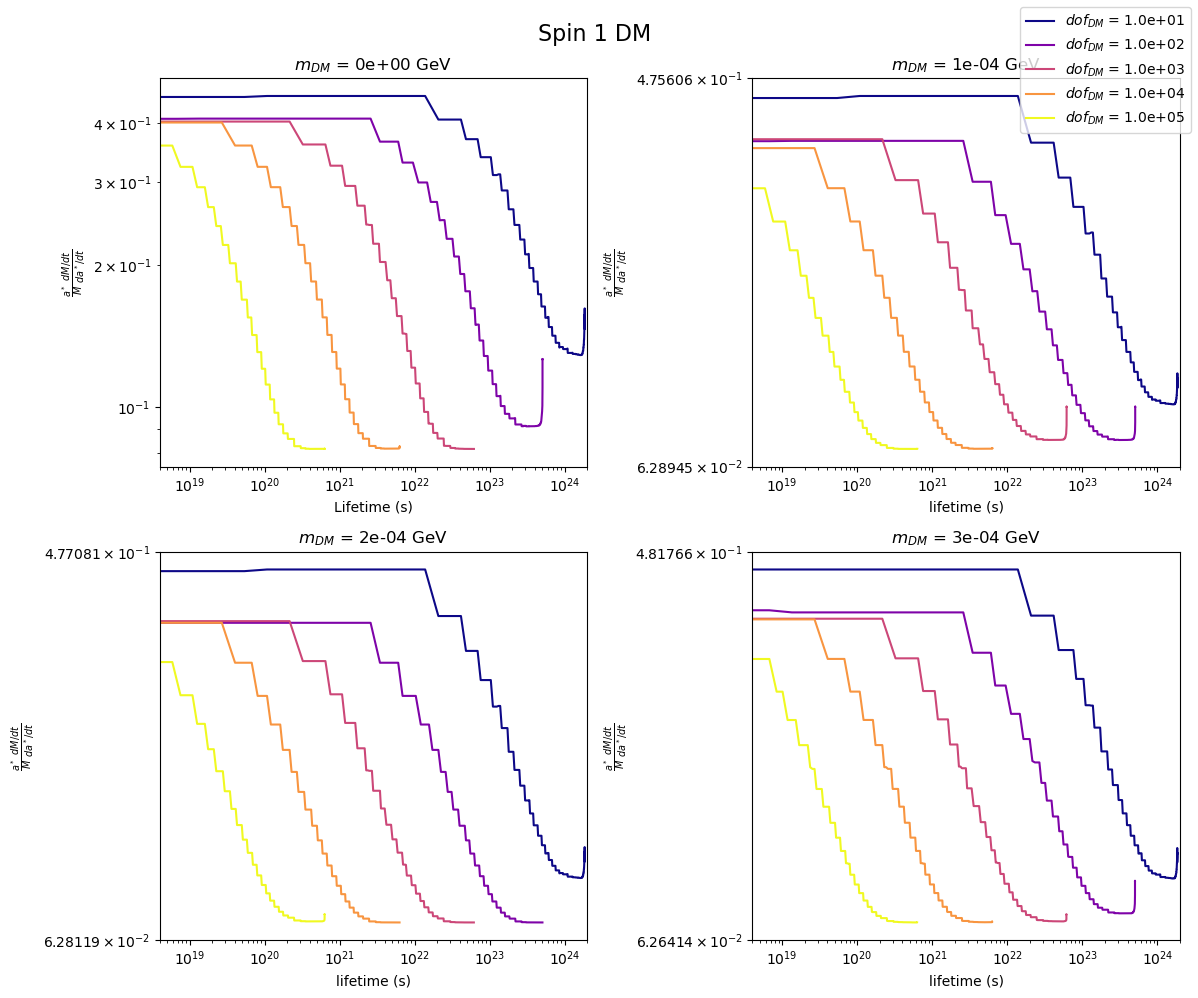

In [10]:
current_dir  = os.getcwd()
main_folder_path = os.path.join(current_dir + '/src/tables/fM_tables/Spin1.0')
output_folder = os.path.join(current_dir +'/spin01_mass')
destination_folder = os.path.join(current_dir +'/src/tables/fM_tables')
fM_file_name = 'fM_add0.txt'
gM_file_name = 'gM_add0.txt'
filepath_fM = destination_folder + '/' + fM_file_name
filepath_gM = destination_folder + '/' + gM_file_name

mdm_values = [0e+0, 1e-4,2e-4, 3e-4] 
# dof_values = [1e01,1e2,1e3,1e4,1e05,1e7,1e9,1e11,1e12,1e15,1e20,1e25,1e30,1e40,1e50]
dof_values = [1e01,1e2,1e3,1e4,1e05]
gev_to_g = 5.60958884e+23
# color_maps =['plasma', 'viridis', 'Spectral','cividis']
color_maps =['plasma', 'plasma', 'plasma','plasma']

colors = []
for cmap_name in color_maps:
    cmap = getattr(plt.cm, cmap_name)  # Get colormap dynamically
    color = cmap(np.linspace(0, 1, len(dof_values)))  # Apply colormap
    colors.append(color)



# anything higher than 2e-4 sheds ang mom before particle is introduced
fig, ax = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 subplots
ax = ax.flatten() 
mdm_list = [f for f in os.listdir(main_folder_path)]
mdm_list.sort()
for mdm_n, i in enumerate(mdm_list):

    if i != ".DS_Store":
        mdm_n = mdm_n-1
        mass_folder =  os.path.join(output_folder + '/{:.1e}'.format(float(i)))
        os.makedirs(mass_folder, exist_ok=True)
        dof_list = sort_scientific_folders(main_folder_path + "/{}".format(i))

        a_max = []
        t_max = []
        loop = 1

        for dof_n, j in enumerate(dof_list):
            print(j)
            if j != ".DS_Store":

                if loop > len(dof_values):
                    break
                else:
                    print(loop)
                    loop += 1
                    dof_folder =  os.path.join(output_folder + '/{:.1e}'.format(float(i)) + '/{:.1e}'.format(float(j)))
                    os.makedirs(dof_folder, exist_ok=True)

                    print("\n **************** {} ****************".format(('Mass','DoF')))
                    print("**************** {} **************** \n ".format((i,j)))
                    move_text_file(os.path.join(main_folder_path + "/{}".format(i)+ "/{}".format(j)), destination_folder, fM_file_name )
                    move_text_file(os.path.join(main_folder_path + "/{}".format(i)+ "/{}".format(j)), destination_folder, gM_file_name )

                    fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a') 
                    gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a') 
                    header = fMdata.columns
                    header = [float(a) for a in header]
                    data_file = [f for f in os.listdir(output_folder + '/{:.1e}'.format(float(i)) + "/{:.1e}".format(float(j))) if f.endswith('.txt')]
                    
                    #Moves fM, gM into fM folder, then need to extract parameters from this table 
                    for n,file in enumerate(data_file):

                        file_path = os.path.join( output_folder + '/{:.1e}'.format(float(i)) + "/{:.1e}".format(float(j)) , file)
                        data = pd.read_csv(file_path,skipinitialspace=True, delimiter =' ', header=0 )
                        # Assume the data has two columns: 'x' and 'y'
                        dadt = []
                        dMdt = []
                        output= [(a,b,c) for a,b,c in zip(data['a'],data['M'], data['t'])]
                        a_change = []
                        t_change = []
                        for x in output:
                            closest_a = closest_value(header, x[0])
                            closest_m = closest_value(gMdata.index,gev_to_g*x[1])
                            cellf = fMdata.loc[closest_m, "{:.5e}".format(closest_a)]
                            cellg = gMdata.loc[closest_m, "{:.5e}".format(closest_a)]
                            dadt = (2*cellf-cellg)/x[1]**3
                            dMdt = -cellf/x[1]**3
                            if dMdt/dadt > 0:
                                t_change.append(x[2])
                                a_change.append(dMdt/dadt)



                    move_text_file(destination_folder, os.path.join(main_folder_path + "/{}".format(i)+ "/{}".format(j)), fM_file_name )
                    move_text_file(destination_folder, os.path.join(main_folder_path + "/{}".format(i)+ "/{}".format(j)), gM_file_name )

                    if mdm_n == 0:
                        ax[mdm_n].plot(t_change, a_change, label = '$dof_{DM}$' + ' = {} '.format(j), color = colors[mdm_n][ dof_n % len(colors[mdm_n])]) 
                        ax[mdm_n].set_title(f'$m_{{DM}}$ = {i} GeV')
                        ax[mdm_n].set_yscale('log')
                        ax[mdm_n].set_xscale('log')
                        ax[mdm_n].set_ylabel('$\\frac{a^*}{M} \\frac{dM/dt}{da^*/dt}$')
                        ax[mdm_n].set_xlabel('Lifetime (s)')
                    else:
                        ax[mdm_n].plot(t_change, a_change, color = colors[mdm_n][ dof_n % len(colors[mdm_n])]) 
                        ax[mdm_n].set_title(f'$m_{{DM}}$ = {i} GeV')
                        ax[mdm_n].set_yscale('symlog')
                        ax[mdm_n].set_xscale('log')
                        ax[mdm_n].set_ylabel('$\\frac{a^*}{M} \\frac{dM/dt}{da^*/dt}$')
                        ax[mdm_n].set_xlabel('lifetime (s)')
                    ax[mdm_n].set_xlim(4e18,2e24)
fig.legend()

fig.suptitle('Spin 1 DM', fontsize=16)

plt.tight_layout()
plt.show()

            

1.0e+01
1

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+01') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/0e+00/1.0e+01
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/0e+00/1.0e+01
1.0e+02
2

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+02') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables


/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2268855118.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2268855118.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2268855118.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/0e+00/1.0e+02
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/0e+00/1.0e+02
1.0e+03
3

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+03') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/0e+00/1.0e+03
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/0e+00/1.0e+03
1.0e+04
4

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+04') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2268855118.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2268855118.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2268855118.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/0e+00/1.0e+04
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/0e+00/1.0e+04
1.0e+05
5

 **************** ('Mass', 'DoF') ****************
**************** ('0e+00', '1.0e+05') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/0e+00/1.0e+05
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/0e+00/1.0e+05
1.0e+07
1.0e+01
1

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+01') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/t

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2268855118.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2268855118.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2268855118.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/1e-04/1.0e+01
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/1e-04/1.0e+01
1.0e+02
2

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+02') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/1e-04/1.0e+02
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/1e-04/1.0e+02
1.0e+03
3

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+03') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2268855118.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2268855118.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2268855118.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/1e-04/1.0e+03
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/1e-04/1.0e+03
1.0e+04
4

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+04') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/1e-04/1.0e+04
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/1e-04/1.0e+04
1.0e+05
5

 **************** ('Mass', 'DoF') ****************
**************** ('1e-04', '1.0e+05') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2268855118.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2268855118.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2268855118.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/1e-04/1.0e+05
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/1e-04/1.0e+05
1.0e+07
1.0e+01
1

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+01') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/2e-04/1.0e+01
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/2e-04/1.0e+01
1.0e+02
2

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+02') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/t

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2268855118.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2268855118.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2268855118.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/2e-04/1.0e+02
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/2e-04/1.0e+02
1.0e+03
3

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+03') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/2e-04/1.0e+03
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/2e-04/1.0e+03
1.0e+04
4

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+04') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2268855118.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2268855118.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2268855118.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/2e-04/1.0e+04
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/2e-04/1.0e+04
1.0e+05
5

 **************** ('Mass', 'DoF') ****************
**************** ('2e-04', '1.0e+05') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/2e-04/1.0e+05
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/2e-04/1.0e+05
1.0e+07
1.0e+01
1

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+01') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/t

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2268855118.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2268855118.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2268855118.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/3e-04/1.0e+01
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/3e-04/1.0e+01
1.0e+02
2

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+02') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/3e-04/1.0e+02
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/3e-04/1.0e+02
1.0e+03
3

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+03') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2268855118.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2268855118.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2268855118.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/3e-04/1.0e+03
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/3e-04/1.0e+03
1.0e+04
4

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+04') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/3e-04/1.0e+04
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/3e-04/1.0e+04
1.0e+05
5

 **************** ('Mass', 'DoF') ****************
**************** ('3e-04', '1.0e+05') **************** 
 
Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2268855118.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2268855118.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_38765/2268855118.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'm

Moved fM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/3e-04/1.0e+05
Moved gM_add0.txt to /Users/chrisewasiuk/Desktop/blackhawk_v2.3/src/tables/fM_tables/Spin2.0/3e-04/1.0e+05
1.0e+07


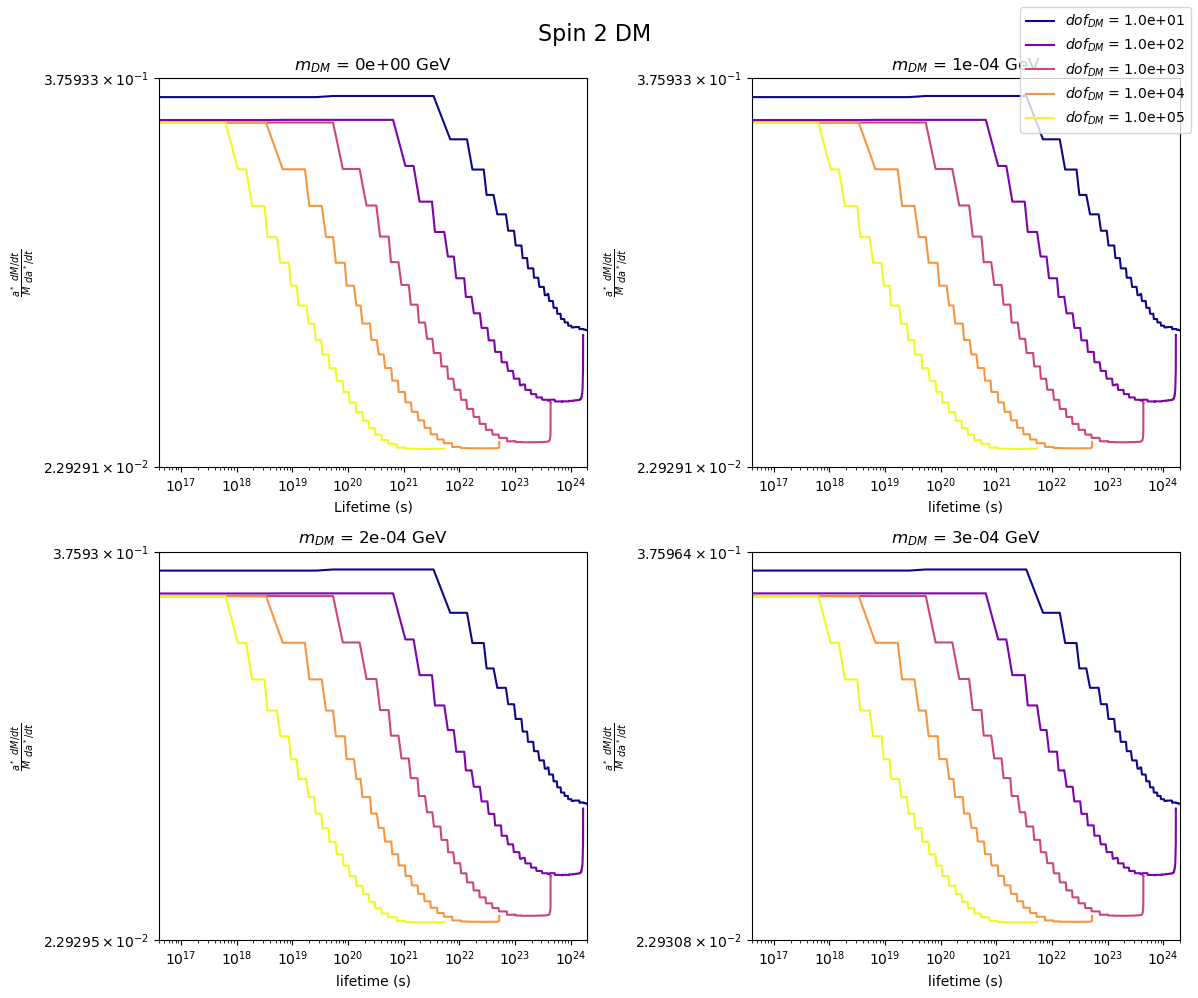

In [11]:
current_dir  = os.getcwd()
main_folder_path = os.path.join(current_dir + '/src/tables/fM_tables/Spin2.0')
output_folder = os.path.join(current_dir +'/spin02_mass')
destination_folder = os.path.join(current_dir +'/src/tables/fM_tables')
fM_file_name = 'fM_add0.txt'
gM_file_name = 'gM_add0.txt'
filepath_fM = destination_folder + '/' + fM_file_name
filepath_gM = destination_folder + '/' + gM_file_name

mdm_values = [0e+0, 1e-4,2e-4, 3e-4] 
# dof_values = [1e01,1e2,1e3,1e4,1e05,1e7,1e9,1e11,1e12,1e15,1e20,1e25,1e30,1e40,1e50]
dof_values = [1e01,1e2,1e3,1e4,1e05]
gev_to_g = 5.60958884e+23
# color_maps =['plasma', 'viridis', 'Spectral','cividis']
color_maps =['plasma', 'plasma', 'plasma','plasma']

colors = []
for cmap_name in color_maps:
    cmap = getattr(plt.cm, cmap_name)  # Get colormap dynamically
    color = cmap(np.linspace(0, 1, len(dof_values)))  # Apply colormap
    colors.append(color)



# anything higher than 2e-4 sheds ang mom before particle is introduced
fig, ax = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 subplots
ax = ax.flatten() 
mdm_list = [f for f in os.listdir(main_folder_path)]
mdm_list.sort()
for mdm_n, i in enumerate(mdm_list):

    if i != ".DS_Store":
        mdm_n = mdm_n-1
        mass_folder =  os.path.join(output_folder + '/{:.1e}'.format(float(i)))
        os.makedirs(mass_folder, exist_ok=True)
        dof_list = sort_scientific_folders(main_folder_path + "/{}".format(i))

        a_max = []
        t_max = []
        loop = 1

        for dof_n, j in enumerate(dof_list):
            print(j)
            if j != ".DS_Store":

                if loop > len(dof_values):
                    break
                else:
                    print(loop)
                    loop += 1
                    dof_folder =  os.path.join(output_folder + '/{:.1e}'.format(float(i)) + '/{:.1e}'.format(float(j)))
                    os.makedirs(dof_folder, exist_ok=True)

                    print("\n **************** {} ****************".format(('Mass','DoF')))
                    print("**************** {} **************** \n ".format((i,j)))
                    move_text_file(os.path.join(main_folder_path + "/{}".format(i)+ "/{}".format(j)), destination_folder, fM_file_name )
                    move_text_file(os.path.join(main_folder_path + "/{}".format(i)+ "/{}".format(j)), destination_folder, gM_file_name )

                    fMdata = pd.read_csv(filepath_fM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a') 
                    gMdata = pd.read_csv(filepath_gM, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a') 
                    header = fMdata.columns
                    header = [float(a) for a in header]
                    data_file = [f for f in os.listdir(output_folder + '/{:.1e}'.format(float(i)) + "/{:.1e}".format(float(j))) if f.endswith('.txt')]
                    
                    #Moves fM, gM into fM folder, then need to extract parameters from this table 
                    for n,file in enumerate(data_file):

                        file_path = os.path.join( output_folder + '/{:.1e}'.format(float(i)) + "/{:.1e}".format(float(j)) , file)
                        data = pd.read_csv(file_path,skipinitialspace=True, delimiter =' ', header=0 )
                        # Assume the data has two columns: 'x' and 'y'
                        dadt = []
                        dMdt = []
                        output= [(a,b,c) for a,b,c in zip(data['a'],data['M'], data['t'])]
                        a_change = []
                        t_change = []
                        for x in output:
                            closest_a = closest_value(header, x[0])
                            closest_m = closest_value(gMdata.index,gev_to_g*x[1])
                            cellf = fMdata.loc[closest_m, "{:.5e}".format(closest_a)]
                            cellg = gMdata.loc[closest_m, "{:.5e}".format(closest_a)]
                            dadt = (2*cellf-cellg)/x[1]**3
                            dMdt = -cellf/x[1]**3
                            if dMdt/dadt > 0:
                                t_change.append(x[2])
                                a_change.append(dMdt/dadt)



                    move_text_file(destination_folder, os.path.join(main_folder_path + "/{}".format(i)+ "/{}".format(j)), fM_file_name )
                    move_text_file(destination_folder, os.path.join(main_folder_path + "/{}".format(i)+ "/{}".format(j)), gM_file_name )

                    if mdm_n == 0:
                        ax[mdm_n].plot(t_change, a_change, label = '$dof_{DM}$' + ' = {} '.format(j), color = colors[mdm_n][ dof_n % len(colors[mdm_n])]) 
                        ax[mdm_n].set_title(f'$m_{{DM}}$ = {i} GeV')
                        ax[mdm_n].set_yscale('symlog')
                        ax[mdm_n].set_xscale('log')
                        ax[mdm_n].set_ylabel('$\\frac{a^*}{M} \\frac{dM/dt}{da^*/dt}$')
                        ax[mdm_n].set_xlabel('Lifetime (s)')
                    else:
                        ax[mdm_n].plot(t_change, a_change, color = colors[mdm_n][ dof_n % len(colors[mdm_n])]) 
                        ax[mdm_n].set_title(f'$m_{{DM}}$ = {i} GeV')
                        ax[mdm_n].set_yscale('symlog')
                        ax[mdm_n].set_xscale('log')
                        ax[mdm_n].set_ylabel('$\\frac{a^*}{M} \\frac{dM/dt}{da^*/dt}$')
                        ax[mdm_n].set_xlabel('lifetime (s)')
                    ax[mdm_n].set_xlim(4e16,2e24)
fig.legend()

fig.suptitle('Spin 2 DM', fontsize=16)

plt.tight_layout()
plt.show()

            